In [2]:
import scipy as sc
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt
import skimage.measure

### Pruebas

In [44]:
im = scio.loadmat('SURREAL/cmu/train/run0/01_01/01_01_c0001_info.mat')
im_2 = scio.loadmat('SURREAL/cmu/train/run0/01_01/01_01_c0001_segm.mat')
im_3 = scio.loadmat('SURREAL/cmu/train/run0/01_01/01_01_c0001_depth.mat')

In [45]:
im.keys()

dict_keys(['__header__', '__version__', '__globals__', 'sequence', 'clipNo', 'source', 'bg', 'gender', 'light', 'stride', 'camDist', 'camLoc', 'joints2D', 'joints3D', 'pose', 'zrot', 'cloth', 'shape'])

In [95]:
len(im['joints2D'][:,:,:].reshape(-1,2).astype(np.int32))

2400

In [5]:
np.ravel(im['joints3D'][:,:,0])

array([ 0.05123147,  0.00856492,  0.08244798,  0.09616657,  0.02472154,
        0.140737  ,  0.09073596,  0.12361019,  0.25646973,  0.07140883,
       -0.01692564,  0.16782233,  0.11651175,  0.04948316,  0.16180933,
        0.06001861, -0.01782041,  0.2258588 , -0.26356697,  0.27121297,
       -0.1769345 ,  0.19989155, -0.15837336,  0.18863167, -1.0124669 ,
       -0.9130529 , -0.91468674, -1.1325101 , -0.50545716, -0.4899464 ,
       -1.2854149 , -0.05762773, -0.05102232, -1.3484507 , -0.00564574,
        0.00386404, -1.5962983 , -1.4933114 , -1.4801968 , -1.6645608 ,
       -1.5047358 , -1.4569048 , -1.340821  , -1.1730936 , -1.5899444 ,
       -0.9139191 , -1.6852291 , -0.83199203, -1.9565752 , -2.0172656 ,
       -1.8907778 , -1.979893  , -2.1042645 , -1.8554045 , -1.987754  ,
       -2.1383004 , -1.9439161 , -1.9749854 , -2.1053946 , -1.8280433 ,
       -1.9866062 , -2.065145  , -1.9114178 , -1.9658166 , -2.1562438 ,
       -1.8115827 , -2.1474752 , -1.7795883 , -2.0336487 , -1.67

In [6]:
im['joints3D'].shape

(3, 24, 100)

In [7]:
seg1 = im_2['segm_1']

In [8]:
seg1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [9]:
np.unique(seg1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 20, 21, 22, 23, 24], dtype=uint8)

In [10]:
np.histogram(im_3['depth_1'][im_3['depth_1'] != 0])


(array([ 5081,     0,     0,     0,     0,     0,     0,     0,     0,
        71719]),
 array([6.43777704e+00, 1.00000001e+09, 2.00000001e+09, 3.00000000e+09,
        4.00000000e+09, 5.00000000e+09, 6.00000000e+09, 7.00000000e+09,
        8.00000000e+09, 9.00000000e+09, 1.00000000e+10]))

In [11]:
im_3['depth_1'][np.where(im_3['depth_1']>.5e+10)] = 0

In [12]:
im_3['depth_1'][im_3['depth_1'] != 0] = (im_3['depth_1'][im_3['depth_1'] != 0]-np.mean(im_3['depth_1'][im_3['depth_1'] != 0]))/np.var(im_3['depth_1'][im_3['depth_1'] != 0])

In [13]:
im_3['depth_1'][im_3['depth_1'] == 0] = np.min(im_3['depth_1'][im_3['depth_1'] != 0])

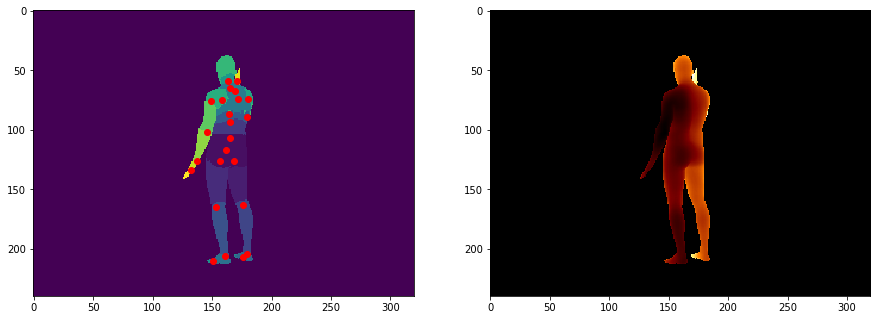

In [14]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(seg1)
plt.scatter(im['joints2D'][:,:,0][0],im['joints2D'][:,:,0][1],color="red")
plt.subplot(1,2,2)
plt.imshow(im_3['depth_1'], cmap='afmhot')

In [15]:
seg1.astype(np.float32)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
skimage.measure.compare_ssim(seg1.astype(np.float32), im_3['depth_1'])

-0.002978282485905521

### Parts identification

In [17]:
np.unique(seg1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 20, 21, 22, 23, 24], dtype=uint8)

In [18]:
points_1 = np.where(seg1 ==10)
points_1

(array([61, 61, 61, 61, 61, 61, 61, 61, 62, 62, 62, 62, 62, 62, 62, 62, 62,
        62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63,
        63, 63, 63, 63, 63, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64,
        64, 64, 64, 64, 64, 64, 64, 64, 65, 65, 65, 65, 65, 65, 65, 65, 65,
        65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 66, 66, 66, 66,
        66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 67, 67, 67, 67, 67, 67,
        67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 68, 68, 68, 68, 68, 68, 68,
        68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 69, 69, 69, 69, 69, 69, 69,
        69, 69, 69, 69, 69, 69, 69, 69, 69, 70, 70, 70, 70, 70, 70, 70, 70,
        70, 70, 70, 70, 70, 70, 70, 70, 71, 71, 71, 71, 71, 71, 71, 71, 71,
        71, 71, 71, 71, 71, 71, 71, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72,
        72, 72, 72, 72, 72, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73,
        73, 73, 73, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74,
        75, 

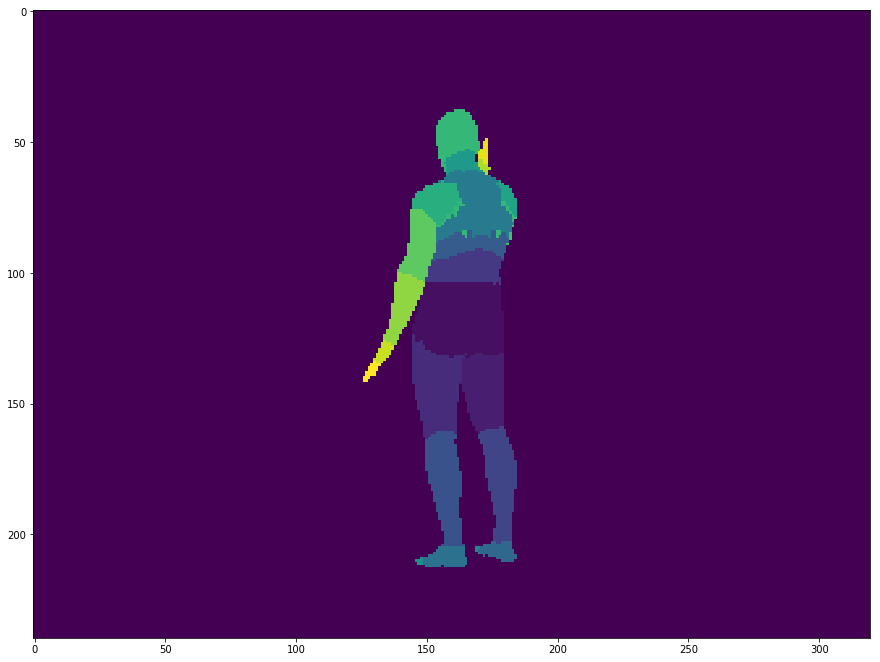

In [19]:
plt.figure(figsize=(15,15))

plt.imshow(seg1)
#plt.scatter(points_1[1],points_1[0],color='red')
plt.show()

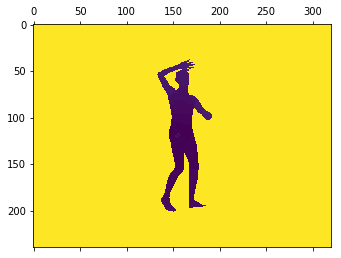

In [16]:
plt.matshow(seg1-1)

In [21]:
np.where(seg1 != 24)

(array([  0,   0,   0, ..., 239, 239, 239]),
 array([  0,   1,   2, ..., 317, 318, 319]))

In [22]:
np.where( (seg1-1 != 23))

(array([  0,   0,   0, ..., 239, 239, 239]),
 array([  0,   1,   2, ..., 317, 318, 319]))

In [34]:
seg1.shape

(240, 320)

In [35]:
seg1.max()

24

In [36]:
seg1.min()

0

In [37]:
len(range(0,25))

25

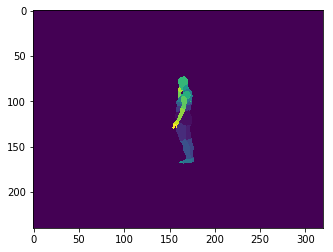

In [38]:
plt.imshow(seg1)
plt.imsave("fig1.png",seg1)

In [9]:
im_2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'segm_1', 'segm_10', 'segm_100', 'segm_11', 'segm_12', 'segm_13', 'segm_14', 'segm_15', 'segm_16', 'segm_17', 'segm_18', 'segm_19', 'segm_2', 'segm_20', 'segm_21', 'segm_22', 'segm_23', 'segm_24', 'segm_25', 'segm_26', 'segm_27', 'segm_28', 'segm_29', 'segm_3', 'segm_30', 'segm_31', 'segm_32', 'segm_33', 'segm_34', 'segm_35', 'segm_36', 'segm_37', 'segm_38', 'segm_39', 'segm_4', 'segm_40', 'segm_41', 'segm_42', 'segm_43', 'segm_44', 'segm_45', 'segm_46', 'segm_47', 'segm_48', 'segm_49', 'segm_5', 'segm_50', 'segm_51', 'segm_52', 'segm_53', 'segm_54', 'segm_55', 'segm_56', 'segm_57', 'segm_58', 'segm_59', 'segm_6', 'segm_60', 'segm_61', 'segm_62', 'segm_63', 'segm_64', 'segm_65', 'segm_66', 'segm_67', 'segm_68', 'segm_69', 'segm_7', 'segm_70', 'segm_71', 'segm_72', 'segm_73', 'segm_74', 'segm_75', 'segm_76', 'segm_77', 'segm_78', 'segm_79', 'segm_8', 'segm_80', 'segm_81', 'segm_82', 'segm_83', 'segm_84', 'segm_85', 'segm_86', 'segm_

In [11]:
idx = np.nonzero(seg1)

In [12]:
seg1[idx[0][0]][idx[1][0]]

16

In [1]:
import cv2

cap = cv2.VideoCapture("03_01_c0001.mp4")
while not cap.isOpened():
    cap = cv2.VideoCapture("03_01_c0001.mp4")
    cv2.waitKey(1000)
    print("Wait for the header")

pos_frame = cap.get(cv2.CAP_PROP_POS_FRAMES)
while True:
    flag, frame = cap.read()
    if flag:
        # The frame is ready and already captured
        cv2.imshow('video', frame)
        pos_frame = cap.get(cv2.CAP_PROP_POS_FRAMES)
        print (str(pos_frame)+" frames")
    else:
        # The next frame is not ready, so we try to read it again
        cap.set(cv2.CAP_PROP_POS_FRAMES, pos_frame-1)
        print ("frame is not ready")
        # It is better to wait for a while for the next frame to be ready
        cv2.waitKey(1000)

    if cv2.waitKey(10) == 27:
        break
    if cap.get(cv2.CAP_PROP_POS_FRAMES) == cap.get(cv2.CAP_PROP_FRAME_COUNT):
        # If the number of captured frames is equal to the total number of frames,
        # we stop
        break


1.0 frames
2.0 frames
3.0 frames
4.0 frames
5.0 frames
6.0 frames
7.0 frames
8.0 frames
9.0 frames
10.0 frames
11.0 frames
12.0 frames
13.0 frames
14.0 frames
15.0 frames
16.0 frames
17.0 frames
18.0 frames
19.0 frames
20.0 frames
21.0 frames
22.0 frames
23.0 frames
24.0 frames
25.0 frames
26.0 frames
27.0 frames
28.0 frames
29.0 frames
30.0 frames
31.0 frames
32.0 frames
33.0 frames
34.0 frames
35.0 frames
36.0 frames
37.0 frames
38.0 frames
39.0 frames
40.0 frames
41.0 frames
42.0 frames
43.0 frames
44.0 frames
45.0 frames
46.0 frames
47.0 frames
48.0 frames
49.0 frames
50.0 frames
51.0 frames
52.0 frames
53.0 frames
54.0 frames
55.0 frames
56.0 frames
57.0 frames
58.0 frames
59.0 frames
60.0 frames
61.0 frames
62.0 frames
63.0 frames
64.0 frames
65.0 frames
66.0 frames
67.0 frames
68.0 frames
69.0 frames
70.0 frames
71.0 frames
72.0 frames
73.0 frames
74.0 frames
75.0 frames
76.0 frames
77.0 frames
78.0 frames
79.0 frames
80.0 frames
81.0 frames
82.0 frames
83.0 frames
84.0 frames
8

In [56]:
import cv2
print(cv2.__version__)
vidcap = cv2.VideoCapture('SURREAL/cmu/train/run0/01_01_use/01_01_c0001.mp4')
success,image = vidcap.read()
count = 0
success = True
while success:
    cv2.imwrite("./frames/frame%d.jpg" % count, image)     # save frame as JPEG file
    success,image = vidcap.read()
    print('Read a new frame: ', success)
    count += 1

3.4.0
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new

In [16]:
!pwd

/home/blue/Documents/data_science_ub/tfm_data


In [16]:
os.path.exists("./icnet/icnet_use_eval/data/val/01_02_c0006_12.jpg")

True

# Script for creating data

### For frames

In [80]:
def frame_capture(name, direc, init_dir):
    real_name = os.path.join(init_dir,name)
    vidcap = cv2.VideoCapture(real_name)
    success,image = vidcap.read()
    count = 1
    success = True
    while success:
        frame_name = name.split(".")[0] + "_" + str(count) + ".jpg"
        if not os.path.exists(os.path.join(direc, frame_name)):
            cv2.imwrite(os.path.join(direc, frame_name), image)     # save frame as JPEG file
        success,image = vidcap.read()
        count += 1

### For matrices

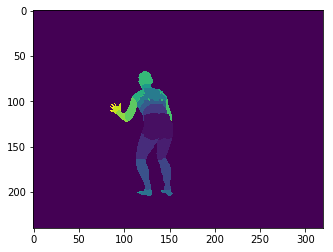

In [122]:
for key in im.keys():
    if key[0] is not "_":
        plt.imshow(im[key])

In [17]:
import imageio

In [81]:
def to_image(name, direc, init_dir):
    real_name = os.path.join(init_dir,name)
    im = sc.io.loadmat(real_name)

    for key in im.keys():
        if key[0] is not "_":
            number = key.split("_")[1]
            frame_name = name.split(".")[0] + "_" + str(number) + ".png"
            if not os.path.exists(os.path.join(direc, frame_name)):
                imageio.imwrite(os.path.join(direc, frame_name), im[key])
   

In [74]:
to_image('ung_85_01_c0001_segm.mat',"./try/" ,'SURREAL/cmu/train/run0/ung_85_01/')

In [76]:
np.unique(imageio.imread('try/ung_85_01_c0001_segm_1.png'))

Image([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=uint8)

### Initial try

In [14]:
import os
import cv2

In [13]:
final_dir = "./SURREAL/cmu/train/run_try_train/train"
final_dir_anot = "./SURREAL/cmu/train/run_try_train/train_anot"
init_try = "./SURREAL/cmu/train/run0/01_01_use/"

init_try_val = "./SURREAL/cmu/train/run0/01_02_use/"
final_dir_eval = "./SURREAL/cmu/train/run_try_val/val"
final_dir_eval_anot = "./SURREAL/cmu/train/run_try_val/val_anot"

In [19]:
for file in os.listdir(init_try_val):
    if file.endswith(".mp4"):
        frame_capture(file, final_dir_eval, init_try_val)

In [21]:
for file in os.listdir(init_try_val):
    if file.endswith("segm.mat"):
        to_image(file,final_dir_eval_anot,init_try_val)

In [14]:
import re

###  for making train list

In [15]:
namy = "list_try_val.txt"
text_file = open(os.path.join(final_dir_eval,"..",namy), "w")

for file in os.listdir(final_dir_eval):
    if re.search(r'.+segm\_\d+\.jpg$', file) is None:
        parts = file.split("_")
        alter = final_dir_eval_anot.split("/")[-1] +"/" + "_".join(parts[0:3]) + "_segm_" + parts[3]
        namelo = final_dir_eval.split("/")[-1] + "/" + file
        text_file.write("{} {}\n".format(namelo, alter))
        
text_file.close()

In [5]:
os.pardir

'..'

In [2]:
def make_list(namy, final_dir_eval, final_dir_eval_anot):
    #pasar nombre de lista
    #y la path de la carpeta samples
    text_file = open(os.path.join(final_dir_eval,"..",namy), "w")

    for file in os.listdir(final_dir_eval):
        if re.search(r'.+segm\_\d+\.jpg$', file) is None:
            parts = file.split("_")
            if not file.startswith("ung"):
                alter = final_dir_eval_anot.split("/")[-1] +"/" + "_".join(parts[0:3]) + "_segm_" + parts[3:]
            else:
                alter = final_dir_eval_anot.split("/")[-1] +"/" + "_".join(parts[0:4]) + "_segm_" + parts[4:]
            
            namelo = final_dir_eval.split("/")[-1] + "/" + file
            text_file.write("{} {}\n".format(namelo, alter))

    text_file.close()
    

# Para el dataset entero

In [2]:
import os
import shutil
import re
import cv2
import scipy as sc
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [85]:
def frame_capture(name, direc, init_dir):
    real_name = os.path.join(init_dir,name)
    vidcap = cv2.VideoCapture(real_name)
    success,image = vidcap.read()
    count = 1
    success = True
    while success:
        frame_name = name.split(".")[0] + "_" + str(count) + ".jpg"
        if not os.path.exists(os.path.join(direc, frame_name)):
            cv2.imwrite(os.path.join(direc, frame_name), image)     # save frame as JPEG file
        success,image = vidcap.read()
        count += 1

In [86]:
def to_image(name, direc, init_dir):
    real_name = os.path.join(init_dir,name)
    im = sc.io.loadmat(real_name)

    for key in im.keys():
        if key[0] is not "_":
            number = key.split("_")[1]
            frame_name = name.split(".")[0] + "_" + str(number) + ".png"
            if not os.path.exists(os.path.join(direc, frame_name)):
                imageio.imwrite(os.path.join(direc, frame_name), im[key])
            

In [87]:
def make_dataset(one_dir):
    offset = os.path.join(one_dir, os.pardir)
 
    new_dirs = [ os.path.join(offset,one_dir.split("/")[-1] + "_complete","run0"),
                os.path.join(offset,one_dir.split("/")[-1] + "_complete","run1"),
                os.path.join(offset,one_dir.split("/")[-1] + "_complete","run2")]
    one_dirs = [os.path.join(one_dir,"run0/"),os.path.join(one_dir,"run1/"),os.path.join(one_dir,"run2/")]
    
    print("recreating structure")
    #extends structure to sample and annotation
    new_dirs_sample = []
    new_dirs_anot = []
    
    for i in new_dirs:
        new_dirs_sample.append(os.path.join(i, "sample"))
        new_dirs_anot.append(os.path.join(i, "annotations"))
        
    #make m new
    for i in new_dirs_sample:
        if not os.path.exists(i):
            os.makedirs(i)
    for i in new_dirs_anot:
        if not os.path.exists(i):
            os.makedirs(i)
        
    print("dataset begins")
    for i in range(len(one_dirs)):
        print("ended")
        print("-"*10,len(os.listdir(one_dirs[i])))
        counter = 0
        #manual solo run0
        if i == 0:
            for dirr_2 in os.listdir(one_dirs[i]):
                counter += 1
                if counter % 50 == 0: print(counter)
                for file in os.listdir(os.path.join(one_dirs[i],dirr_2)):
                    init_try = os.path.join(one_dirs[i],dirr_2)
                    if file.endswith(".mp4"):
                        frame_capture(file, new_dirs_sample[i], init_try )
                    if file.endswith("segm.mat"):
                        to_image(file,new_dirs_anot[i],init_try)

In [94]:
init_dir = "./SURREAL/cmu/test"

In [95]:
make_dataset(init_dir)

recreating structure
dataset begins
ended
---------- 703
50
100
150
200
250
300
350
400
450
500
550
600
650
700
ended
---------- 703
ended
---------- 703


## For cluster

In [35]:
import sklearn.cluster as skcl
import scipy.io as scio
import numpy as np
import os

In [37]:
def for_k_means(one_dir):
    
    list_values = []
    list_names = []
    
    one_dirs = [os.path.join(one_dir,"run0/"),os.path.join(one_dir,"run1/"),os.path.join(one_dir,"run2/")]

    for i in range(len(one_dirs)):
        print("ended")
        print("-"*10,len(os.listdir(one_dirs[i])))
        counter = 0
        #only for run 0
        if i == 0:
            for dirr_2 in os.listdir(one_dirs[i]):
                counter +=1
                if counter % 50 == 0: print(counter)

                for file in os.listdir(os.path.join(one_dirs[i],dirr_2)):

                    init_try = os.path.join(one_dirs[i],dirr_2)
                    if file.endswith("info.mat"):
                        if not file.startswith("ung"):
                            name_1 = file.split("_")
                            name_  = "_".join(name_1[:3])
                        else:
                            name_1 = file.split("_")
                            name_  = "_".join(name_1[:4])

                        im = scio.loadmat(os.path.join(one_dirs[i], dirr_2,file))
                        joint = im['joints3D']
                        try:
                            for z in range(joint.shape[2]):
                                file_name = name_ + "_" + str(z+1)
                                list_values.append(np.ravel(joint[:,:,z]))
                                list_names.append(one_dirs[i].split("/")[-2]+ "/" +file_name)

                        except IndexError:
                            pass
    return list_names,list_values

### For training (two clusters big and small)

In [ ]:
names,values = for_k_means("SURREAL/cmu/train/")

ended
---------- 1964
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750


In [ ]:
np.save("./clusters/train_values.npy", values)
np.save("./clusters/train_names.npy", names)

In [21]:
len(values) / 25

64201.16

In [96]:
values = np.load("./clusters/train_values.npy")
names = np.load("./clusters/train_names.npy")

In [3]:
kmeans = skcl.KMeans(n_clusters=25).fit(values)
labels = kmeans.labels_

In [14]:
np.save("./clusters/labels.npy", kmeans.labels_)

In [97]:
labels = np.load("./clusters/labels.npy")

In [98]:
len(labels[labels==1])

92961

In [106]:
names[labels==21]

array(['run0/132_25_c0002_72', 'run0/132_25_c0002_73',
       'run0/132_25_c0002_74', ..., 'run0/91_25_c0007_98',
       'run0/91_25_c0007_99', 'run0/91_25_c0007_100'], dtype='<U25')

In [105]:
cluster_1 = names[labels==1]
cluster_2 = names[labels==21]

### Checking if we have all of them and move em

In [101]:
import shutil
import re

In [102]:
path = "./SURREAL/cmu/train_complete/"
path_dir = "./SURREAL/cmu/cluster_train/"
path_dir_2 = "./SURREAL/cmu/cluster_train_2/"

In [107]:
def copy_to_cluster(path, path_dir, cluster_name):
    #the structure has to be : cluster---> 
        #sample
        #annotations
        
    #and the initial:
        #train
            # run
                #sample
                #annotations
    l = []
    for i in cluster_name:
        listy = i.split("/")
        listy_2 = listy[1].split("_")
        namy = "_".join(listy_2[:-1]) + "_" +"segm" + "_" + listy_2[-1]

        complete_name = listy[0] + "/" + "sample" + "/" + listy[1] + ".jpg" #para comprobar
        complete_ground_name = listy[0] + "/" + "annotations" + "/" + namy + ".png" #para comprobar

        complete_ground_name_copy =  "annotations" + "/" + namy + ".png"
        complete_name_copy = "sample" + "/" + listy[1] + ".jpg" #para copiar

        complete_path = os.path.join(path, complete_name)
        complete_f_path_copy = os.path.join(path_dir, complete_name_copy)
        complete_path_ground = os.path.join(path, complete_ground_name)
        complete_f_path_ground_copy = os.path.join(path_dir, complete_ground_name_copy)

        if not os.path.exists(complete_path):
            print(complete_path)
            l.append(complete_path)
        shutil.copy2(complete_path, complete_f_path_copy)
        shutil.copy2(complete_path_ground, complete_f_path_ground_copy)
    

In [108]:
copy_to_cluster(path, path_dir_2, cluster_2)

### For eval (only one small)

In [84]:
names,values = for_k_means("SURREAL/cmu/val/")#only run0

ended
---------- 235
50
100
150
200
ended
---------- 234
ended
---------- 234


In [85]:
np.save("./clusters/val_values.npy", values)
np.save("./clusters/val_names.npy", names)

In [86]:
len(values) / 10

1523.5

In [109]:
values = np.load("./clusters/val_values.npy")
names = np.load("./clusters/val_names.npy")

In [88]:
kmeans = skcl.KMeans(n_clusters=10).fit(values)
labels = kmeans.labels_

In [89]:
np.save("./clusters/val_labels.npy", kmeans.labels_)

In [110]:
labels = np.load("./clusters/val_labels.npy")

In [111]:
len(labels[labels==6])

1411

In [112]:
cluster_val = names[labels==6]

### Checking if we have all of them and move em

In [40]:
import shutil
import re

In [113]:
path = "./SURREAL/cmu/val_complete/"
path_dir = "./SURREAL/cmu/cluster_val/"

In [114]:
copy_to_cluster(path, path_dir, cluster_val)

## For test

In [38]:
names,values = for_k_means("SURREAL/cmu/test/")

ended
---------- 703
50
100
150
200
250
300
350
400
450
500
550
600
650
700
ended
---------- 703
ended
---------- 703


In [39]:
np.save("./clusters/test_values.npy", values)
np.save("./clusters/test_names.npy", names)

In [40]:
len(values) / 25

14488.56

In [115]:
values = np.load("./clusters/test_values.npy")
names = np.load("./clusters/test_names.npy")

In [41]:
kmeans = skcl.KMeans(n_clusters=25).fit(values)
labels = kmeans.labels_

In [55]:
np.save("./clusters/labels_test.npy", kmeans.labels_)

In [116]:
labels = np.load("./clusters/labels_test.npy")

In [117]:
len(labels[labels==4])

16965

In [118]:
names[labels==4]

array(['run0/ung_60_03_c0006_14', 'run0/ung_60_03_c0006_15',
       'run0/ung_60_03_c0006_16', ..., 'run0/ung_138_21_c0001_97',
       'run0/ung_138_21_c0001_98', 'run0/ung_138_21_c0001_99'],
      dtype='<U25')

In [119]:
cluster_1 = names[labels==4]

### Checking if we have all of them and move em

In [78]:
import shutil
import re

In [120]:
path = "./SURREAL/cmu/test_complete/"
path_dir = "./SURREAL/cmu/cluster_test/"

In [121]:
copy_to_cluster(path, path_dir, cluster_1)

### Make lists

#### Big cluster

In [122]:
make_list("eval_cluster_list.txt", "./SURREAL/cmu/val_complete/run0/sample","./SURREAL/cmu/val_complete/run0/annotations" )

In [123]:
make_list("train_cluster_list.txt", "./SURREAL/cmu/cluster_train/sample","./SURREAL/cmu/cluster_train/annotations" )

In [124]:
make_list("test_cluster_list.txt", "./SURREAL/cmu/cluster_test/sample","./SURREAL/cmu/cluster_test/annotations" )

#### Small cluster

In [125]:
make_list("eval_cluster_list.txt", "./SURREAL/cmu/cluster_val/sample","./SURREAL/cmu/cluster_val/annotations" )

In [126]:
make_list("train_cluster_list.txt", "./SURREAL/cmu/cluster_train_2/sample","./SURREAL/cmu/cluster_train_2/annotations" )

mod

In [4]:
make_list("eval_cluster_list.txt", "./SURREAL/cmu/cluster_mod_eval/sample","./SURREAL/cmu/cluster_mod_eval/annotations" )

In [26]:
make_list("train_cluster_list.txt", "./SURREAL/cmu/cluster_mod_train/sample","./SURREAL/cmu/cluster_mod_train/annotations" )

In [8]:
make_list("test_cluster_list.txt", "./SURREAL/cmu/cluster_mod_test/sample","./SURREAL/cmu/cluster_mod_test/annotations" )

## Calculate image RGB mean for SURREAL

In [4]:
import os
import shutil
import re
import cv2
import scipy as sc
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [5]:
path = "./SURREAL/cmu/train_complete/run0/sample/28_12_c0012_23.jpg"

In [11]:
im = imageio.imread(path)
im.shape

(240, 320, 3)

In [16]:
np.mean(im[:,:,0])

128.95747395833334

### Loop for obtaining mean of RGB throug run0 

In [20]:
path = "./SURREAL/cmu/train_complete/run0/sample/"

In [22]:
l1 = []
l2 = []
l3 = []
count = 0
length = len(os.listdir(path))
print("-"*10, length)
for i in os.listdir(path):
    name = os.path.join(path, i)
    im = imageio.imread(name)
    c1 = np.mean(im[:,:,0])
    c2 = np.mean(im[:,:,1])
    c3 = np.mean(im[:,:,2])
    l1.append(c1)
    l2.append(c2)
    l3.append(c3)
    count += 1
    if count % 10000 == 0: print(count)

---------- 1605030
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1

In [23]:
mean1 = np.mean(l1)
mean2 = np.mean(l2)
mean3 = np.mean(l3)
ltotal = np.array([mean1,mean2,mean3])

In [24]:
ltotal

array([136.31864516, 120.77209279, 106.96920148])

In [25]:
np.save("color_mean.npy", ltotal)

In [26]:
ltotal = np.load("color_mean.npy")

In [27]:
ltotal

array([136.31864516, 120.77209279, 106.96920148])

In [28]:
os.path.exists("color_mean.npy")

True

## Checking ground truth images and images


In [312]:
path = "./SURREAL/cmu/cluster_mod_train_heal/sample/"
path_2 = "./SURREAL/cmu/cluster_mod_train_heal/annotations/"

In [313]:
n = 100
name = np.random.choice(os.listdir(path), n)
labels = []
names = []
for i in name:
    parts = i.split("_")
    if i.startswith("ung"):
        label = "_".join(parts[:4]) + "_segm_" + parts[4].split(".")[0] + ".png"
    else:
        label = "_".join(parts[:3]) + "_segm_" + parts[3].split(".")[0] + ".png"
    f_name = os.path.join(path, i)
    names.append(f_name)
    f_label = os.path.join(path_2,label)
    labels.append(f_label)

In [314]:
labels

['./SURREAL/cmu/cluster_mod_train_heal/annotations/32_15_c0013_segm_79.png',
 './SURREAL/cmu/cluster_mod_train_heal/annotations/ung_114_15_c0002_segm_72.png',
 './SURREAL/cmu/cluster_mod_train_heal/annotations/ung_126_01_c0006_segm_50.png',
 './SURREAL/cmu/cluster_mod_train_heal/annotations/28_12_c0023_segm_9.png',
 './SURREAL/cmu/cluster_mod_train_heal/annotations/126_08_c0002_segm_98.png',
 './SURREAL/cmu/cluster_mod_train_heal/annotations/15_02_c0089_segm_13.png',
 './SURREAL/cmu/cluster_mod_train_heal/annotations/137_11_c0023_segm_3.png',
 './SURREAL/cmu/cluster_mod_train_heal/annotations/91_31_c0006_segm_82.png',
 './SURREAL/cmu/cluster_mod_train_heal/annotations/131_02_c0006_segm_21.png',
 './SURREAL/cmu/cluster_mod_train_heal/annotations/ung_144_10_c0014_segm_84.png',
 './SURREAL/cmu/cluster_mod_train_heal/annotations/55_06_c0034_segm_12.png',
 './SURREAL/cmu/cluster_mod_train_heal/annotations/91_47_c0001_segm_19.png',
 './SURREAL/cmu/cluster_mod_train_heal/annotations/ung_142_0

In [6]:
for i in labels:
    a = np.unique(imageio.imread(i))
    if np.any(a>24): print(i)            

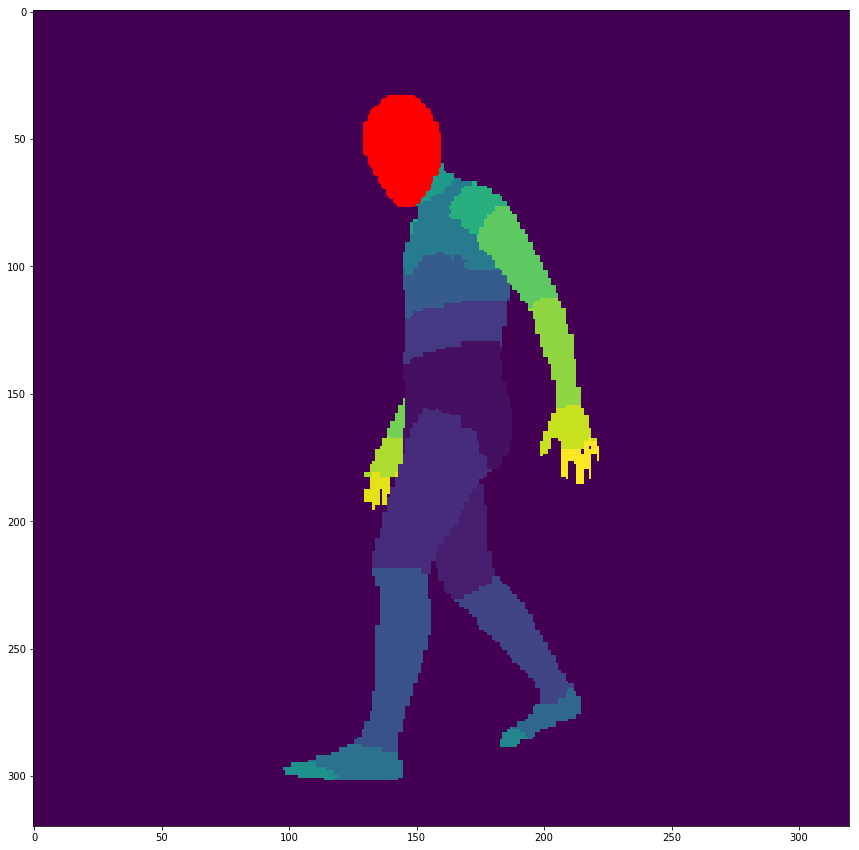

In [326]:
im2 =imageio.imread(labels[80])
points_1 = np.where(im2 ==16)
plt.figure(figsize=(15,15))
plt.imshow(im2)
plt.scatter(points_1[1],points_1[0],color='red')
plt.show()

In [9]:
for i in range(len(names)):
    im = imageio.imread(names[i])
    namy = names[i].split("/")[-1]
    imageio.imsave(os.path.join("./SURREAL/images/sample",namy),im)
    im = imageio.imread(labels[i])
    namy = labels[i].split("/")[-1]
    imageio.imsave(os.path.join("./SURREAL/images/annotations",namy),im)

In [73]:
for i in range(len(names)):
    im = imageio.imread(names[i])
    print(im.shape)

(320, 320, 3)


### fake cluster

In [7]:
for i in range(len(names)):

    im = imageio.imread(names[i])
    namy = names[i].split("/")[-1]
    part = namy.split(".")
    full_name = part[0] + "_" + str(j) + "." + part[1]
    imageio.imsave(os.path.join("./SURREAL/cmu/cluster_fake/sample/",full_name),im)

    im = imageio.imread(labels[i])
    namy = labels[i].split("/")[-1]
    part = namy.split(".")
    full_name = part[0] + "_" + str(j) + ".png"
    imageio.imsave(os.path.join("./SURREAL/cmu/cluster_fake/annotations/",full_name),im, format="png")

NameError: name 'j' is not defined

In [3]:
def make_list(namy, final_dir_eval, final_dir_eval_anot):
    #pasar nombre de lista
    #y la path de la carpeta samples
    text_file = open(os.path.join(final_dir_eval,"..",namy), "w")

    for file in os.listdir(final_dir_eval):
        if re.search(r'.+segm\_\d+\.jpg$', file) is None:
            parts = file.split("_")
            if not file.startswith("ung"):
                alter = final_dir_eval_anot.split("/")[-1] +"/" + "_".join(parts[0:3]) + "_segm_" + "_".join(parts[3:])
                pp = alter.split(".")
                alter = pp[0] +"." +"png"
            else:
                alter = final_dir_eval_anot.split("/")[-1] +"/" + "_".join(parts[0:4]) + "_segm_" + "_".join(parts[4:])
                pp = alter.split(".")
                alter = pp[0] +"." +"png"
            namelo = final_dir_eval.split("/")[-1] + "/" + file
            text_file.write("{} {}\n".format(namelo, alter))

    text_file.close()

In [13]:
make_list("cluster_fake_list.txt", "./SURREAL/cmu/cluster_fake/sample","./SURREAL/cmu/cluster_fake/annotations" )

### fake cluster labels changed

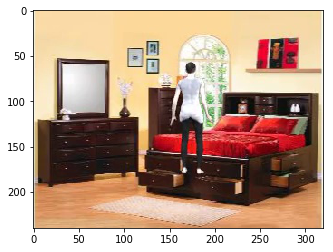

In [109]:
im = imageio.imread("./SURREAL/cmu/cluster_train/sample/01_01_c0012_24.jpg")
plt.imshow(im)
imageio.imsave("original_image.jpg",im)

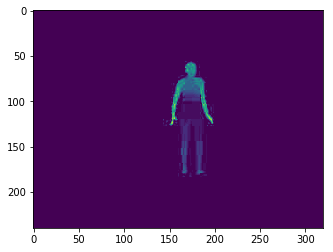

In [110]:
im = imageio.imread("./SURREAL/cmu/cluster_train/annotations/01_01_c0012_segm_24.jpg")
plt.imshow(im)
imageio.imsave("label_image.jpg",im)

### Reducing label 

If input is 320x320 the input of the lower branch is 80x80 and the resulting output is 19x19.

/home/blue/.virtualenvs/cv/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.
/home/blue/.virtualenvs/cv/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


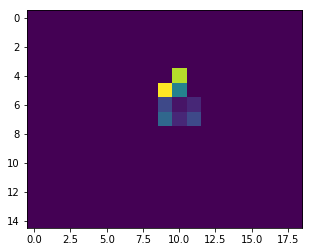

In [117]:
plt.imshow(sc.misc.imresize(im, (15,19), interp="nearest"))
ima = sc.misc.imresize(im, (15,19), interp="nearest")
imageio.imsave("label_downsample_15_19_image.jpg",ima)

### for aitor validation dummy

# Crop and top

algorithm to crop frames

In [2]:
import os
import shutil
import re
import cv2
import scipy as sc
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt
import imageio
from skimage import transform
import math

In [117]:
im_2 = scio.loadmat('SURREAL/cmu/train/run0/01_01/01_01_c0001_segm.mat')

In [118]:
image = im_2['segm_1']
shapy = image.shape

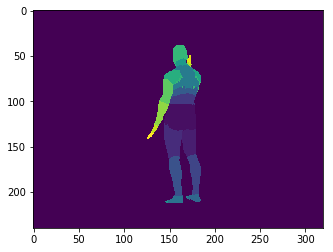

In [119]:
plt.imshow(image)

In [5]:
def find_crops(im,perc_w =0.1, perc_h=0.1):
    shapy = im.shape
    left = []
    right = []
    top = []
    bottom = []

    for i in range(shapy[0]):
        for j in range(shapy[1]):
            if im[i,j] != 0:
                left.append(j)
                break
        for j in range(shapy[1]-1,-1,-1):
            if im[i,j] != 0:
                right.append(j)
                break

    for j in range(shapy[1]):
        for i in range(shapy[0]):
            if im[i,j] != 0:
                top.append(i)
                break
        for i in range(shapy[0]-1,-1,-1):
            if im[i,j] != 0:
                bottom.append(i)
                break
    try:
        f_left = np.min(left)
        f_right = np.max(right)
        f_top = np.min(top)
        f_bottom = np.max(bottom)

        width = f_right -f_left
        height = f_bottom -f_top

        wth_plus = width*perc_w
        hgt_plus= height*perc_h

        f_left = int(round(f_left - wth_plus,0))
        f_right = int(round(f_right + wth_plus,0))
        f_top = int(round(f_top - hgt_plus,0))
        f_bottom = int(round(f_bottom + hgt_plus,0))

        new_w = f_right - f_left
        new_h = f_bottom - f_top

        if new_h > new_w:
            center = f_left + new_w/2
            f_left = int(math.ceil(center - new_h/2))
            f_right = int(math.ceil(center + new_h/2))
        else:
            center = f_top + new_h/2
            f_top = int(math.ceil(center - new_w/2))
            f_bottom = int(math.ceil(center + new_w/2))

        if f_left < 0: 
            residual = -f_left
            f_left = 0
            f_right = f_right + residual
        if f_right > shapy[1]-1: 
            residual = f_right -(shapy[1]-1)
            f_right = shapy[1]-1
            f_left = f_left -residual
        if f_top < 0:
            residual = -f_top
            f_top = 0
            f_bottom = f_bottom + residual
        if f_bottom > shapy[0]-1: 
            residual = f_bottom -(shapy[0]-1)
            f_bottom = shapy[0]-1
            f_top = f_top -residual

        if f_left < 0: f_left = 0
        if f_right > shapy[1]-1: f_right = shapy[1]-1
        if f_top < 0: f_top = 0
        if f_bottom > shapy[0]-1:f_bottom = shapy[0]-1
            
        if np.abs(f_right-f_left-(f_bottom-f_top)) == 1:
            if f_bottom-f_top > f_right-f_left:
                if f_left != 0:
                    f_left -= 1
                else:
                    f_right +=1
            if f_bottom-f_top < f_right-f_left:
                if f_top != 0:
                    f_top -= 1
                else:
                    f_bottom +=1  

        if f_right-f_left != f_bottom-f_top:
            if shapy[0] == np.min(shapy):
                if f_right-f_left > shapy[0]-1:
                    center = f_left + (f_right-f_left)/2
                    f_left = int(math.ceil(center - (shapy[0]-1)/2))
                    f_right = int(math.ceil(center +(shapy[0]-1)/2))
                if f_right-f_left < shapy[0]-1:
                    if f_left == 0:
                        f_right = shapy[0]-1
                    if f_right == shapy[1]-1:
                        f_left = f_left - (shapy[0]-(f_right-f_left))
            if shapy[1] == np.min(shapy):
                if f_bottom-f_top > shapy[1]:

                    center = f_top + (f_bottom-f_top)/2
                    f_top = int(math.ceil(center - (shapy[1]-1)/2))
                    f_bottom= int(math.ceil(center +(shapy[1]-1)/2))
                if f_bottom-f_top < shapy[1]-1:
                    if f_top == 0:
                        f_bottom = shapy[1]-1
                    if f_bottom == shapy[0]-1:
                        f_top = f_top - (shapy[1]-(f_bottom-f_top))


    except ValueError:
        if shapy[0] == np.min(shapy):
            f_left = 0
            f_right = shapy[0]-1
            f_bottom = shapy[0]-1
            f_top = 0
        if shapy[1]== np.min(shapy):
            f_left = 0
            f_right = shapy[1]-1
            f_bottom = shapy[1]-1
            f_top = 0
        
    assert f_right-f_left == f_bottom-f_top
    
    return f_left,f_top,f_right,f_bottom

def crop(im, f_left,f_top,f_right, f_bottom):
    new_im = im[f_top:f_bottom, f_left:f_right]
    return new_im

def resizeim(new_im, shapy):
    final_im = sc.misc.imresize(new_im, shapy, interp="nearest")
    return final_im


126 38 184 212
51 21 259 229
51 21 259 229
208 208
(208, 208)


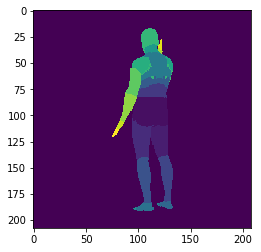

In [157]:
l,t,r,b = find_crops(im_2['segm_1'])
new_im =crop(im_2['segm_1'],l,t,r,b)
print(new_im.shape)
plt.imshow(new_im)

(240, 320)
(208, 208)
______________________________


/home/blue/.virtualenvs/cv/lib/python3.6/site-packages/ipykernel_launcher.py:92: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


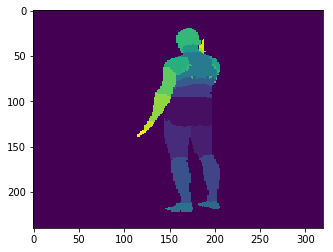

In [132]:
final_im = resizeim(new_im, im_2['segm_1'].shape)
plt.imshow(final_im)

In [133]:
im_2_true = imageio.imread('SURREAL/cmu/train_complete/run0/sample/01_01_c0001_1.jpg')

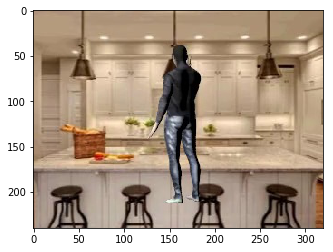

In [134]:
plt.imshow(im_2_true)

208 208
(208, 208, 3)


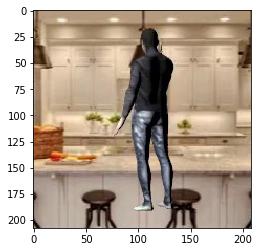

In [135]:
new_im_true = crop(im_2_true,l,t,r,b)
print(new_im_true.shape)
plt.imshow(new_im_true)

(240, 320, 3)
(208, 208, 3)
______________________________


/home/blue/.virtualenvs/cv/lib/python3.6/site-packages/ipykernel_launcher.py:92: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
Exception ignored in: <bound method Image.__del__ of <PIL.Image.Image image mode=L size=0x239 at 0x7FB8AAEB50F0>>
Traceback (most recent call last):
  File "/home/blue/.virtualenvs/cv/lib/python3.6/site-packages/PIL/Image.py", line 586, in __del__
    def __del__(self):
KeyboardInterrupt


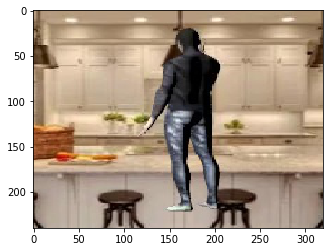

In [136]:
final_im_true = resizeim(new_im_true,im_2_true.shape)
plt.imshow(final_im_true)

In [30]:
imageio.imsave(os.path.join("./SURREAL/cropped/","true_ground.jpg"),image)
imageio.imsave(os.path.join("./SURREAL/cropped/","cropped_ground.jpg"),new_im)
imageio.imsave(os.path.join("./SURREAL/cropped/","resized_ground.jpg"),final_im)
imageio.imsave(os.path.join("./SURREAL/cropped/","true_image.jpg"),im_2_true)
imageio.imsave(os.path.join("./SURREAL/cropped/","cropped_image.jpg"),new_im_true)
imageio.imsave(os.path.join("./SURREAL/cropped/","resized_image.jpg"),final_im_true)


# Transform (crop and resize) and create new cluster from previous

In [129]:
obj_dir = "./SURREAL/cmu/cluster_train/annotations/"
final_dir = "./SURREAL/cmu/cluster_mod_train/"

In [37]:
def new_cluster(obj_dir, final_dir, shape = (320,320)):
    long = len(os.listdir(obj_dir))
    print("-"*10,long)
    count = 0
    for i in os.listdir(obj_dir):
        try:
            im = imageio.imread(os.path.join(obj_dir, i))
            l,t,r,b = find_crops(im)
            new_im = crop(im,l,t,r,b)
            final_im = resizeim(new_im, shape)
            imageio.imsave(os.path.join(final_dir,"annotations", i), final_im)
            
            if not i.startswith("ung"):
                name_1 = i.split("_")
                name_  = "_".join(name_1[:3]) + "_" + name_1[4]
            else:
                name_1 = i.split("_")
                name_  = "_".join(name_1[:4]) + "_" + name_1[5]
                
            obj_dir_split = obj_dir.split("/")
            
            if len(obj_dir_split)>6:
                namei = name_.split(".")
                name_ = namei[0] +"."+"jpg"
                im_name = os.path.join("/".join(obj_dir_split[:5]),"sample", name_)
            else:
                namei = name_.split(".")
                name_ = namei[0] +"."+"jpg"
                im_name = os.path.join("/".join(obj_dir_split[:4]),"sample", name_)
            
            sample_image = imageio.imread(im_name)
            new_im = crop(sample_image,l,t,r,b)
            final_im = resizeim(new_im, shape)
            imageio.imsave(os.path.join(final_dir,"sample",name_),final_im)
            
        except ValueError:
            pass
        
        count +=1
        if count % 500 == 0: print(count)

In [ ]:
new_cluster(obj_dir, final_dir)

---------- 92961


/home/blue/.virtualenvs/cv/lib/python3.6/site-packages/ipykernel_launcher.py:136: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
25000
25500
26000
26500
27000
27500
28000
28500
29000
29500
30000
30500
31000
31500
32000
32500
33000
33500
34000
34500
35000
35500
36000
36500
37000
37500
38000
38500
39000
39500
40000
40500
41000
41500
42000
42500
43000
43500
44000
44500
45000
45500
46000
46500
47000
47500
48000
48500
49000
49500
50000
50500
51000
51500
52000
52500
53000
53500
54000
54500
55000
55500
56000
56500


In [12]:
obj_dir = "./SURREAL/cmu/cluster_test/annotations/"
final_dir = "./SURREAL/cmu/cluster_mod_test/"

In [7]:
new_cluster(obj_dir, final_dir)

---------- 16965


/home/blue/.virtualenvs/cv/lib/python3.6/site-packages/ipykernel_launcher.py:136: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500


In [38]:
obj_dir = "./SURREAL/cmu/val_complete/run0/annotations/"
final_dir = "./SURREAL/cmu/cluster_mod_eval/"

In [39]:
new_cluster(obj_dir, final_dir)

---------- 15235


/home/blue/.virtualenvs/cv/lib/python3.6/site-packages/ipykernel_launcher.py:135: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000


# Cityscapes

In [27]:
im=imageio.imread("./cityscapes/zurich/zurich_000000_000019_gtFine_labelIds.png")

In [28]:
np.unique(im)

Image([ 0,  1,  3,  4,  5,  6,  7,  8, 11, 13, 17, 19, 20, 21, 23, 24, 26,
       31], dtype=uint8)

In [64]:
np.min(im)

0

# Corta listas

In [13]:
path = "./icnet/icnet_use_train_eval/list/train_cluster_list.txt"

In [35]:
def cut_list(path):
    lista = open(path, 'r')
    images = []
    annot = []
    for i in lista:
        parts = i.split(" ")
        images.append(parts[0])
        annot.append(parts[1].split("\n")[0])

    name = path.split("/")[-1]
    a_name = name.split(".")[0] + "_1.txt"
    f_name_1  = os.path.join("/".join(path.split("/")[:-1]), a_name)
    
    b_name = name.split(".")[0] + "_2.txt"
    f_name_2  = os.path.join("/".join(path.split("/")[:-1]),b_name)

    file_1 = open(f_name_1, 'w')

    for i in range(0, len(images)//2):
        file_1.write("{} {}\n".format(images[i],annot[i]))

    file_1.close

    file_2 = open(f_name_2, 'w')

    for i in range(len(images)//2,len(images)):
        file_2.write("{} {}\n".format(images[i],annot[i]))

    file_2.close


In [36]:
cut_list(path)

# Weights for loss in icnet

In [1]:
import numpy as np
import os
import imageio

In [23]:
path = "./SURREAL/cmu/cluster_mod_train/annotations/"

In [27]:
countin = np.zeros(25)
freqs = []
length = len(os.listdir(path))
count = 0
print("-"*10, length)
for i in os.listdir(path):
    name = os.path.join(path, i)
    im = imageio.imread(name)
    h,w = im.shape
    for j in range(h):
        for l in range(w):
            countin[im[j,l]] += 1 
    idi, counts = np.unique(im, return_counts=True)
    counts = counts/(320*320)
    freqs.append(counts)
    count += 1
    if count % 2500 == 0: print(count)

---------- 92961
2500


KeyboardInterrupt: 

In [48]:
freqs = np.array([])
length = len(os.listdir(path))
count = 0
print("-"*10, length)
for i in os.listdir(path):
    name = os.path.join(path, i)
    im = imageio.imread(name)
    idi, counts = np.unique(im, return_counts=True)
    counts = counts/(320*320)
    arr_freqs = np.zeros(25)
    for i in range(len(idi)):
        arr_freqs[idi[i]] = counts[i]
    freqs = np.append(freqs,arr_freqs)
    count += 1
    if count % 2500 == 0: print(count)

---------- 92961
2500
5000
7500
10000
12500
15000
17500
20000
22500
25000
27500
30000
32500
35000
37500
40000
42500
45000
47500
50000
52500
55000
57500
60000
62500
65000
67500
70000
72500
75000
77500
80000
82500
85000
87500
90000
92500


In [49]:
np.save("clusters/freqs.npy", np.array(freqs))

In [79]:
freqs = np.load("clusters/freqs.npy")

In [8]:
np.save("clusters/pixelclass.npy",countin)

In [2]:
countin = np.load("clusters/pixelclass.npy")

In [23]:
countin

array([8.31312611e+09, 2.00494049e+08, 1.17262212e+08, 1.13602200e+08,
       6.75087570e+07, 9.50513100e+07, 9.23706340e+07, 5.76998570e+07,
       2.31719470e+07, 2.34867850e+07, 8.75799490e+07, 4.14257300e+06,
       5.97630400e+06, 1.52836080e+07, 2.24822270e+07, 1.95588690e+07,
       8.19075920e+07, 3.94959130e+07, 3.82013430e+07, 3.10938320e+07,
       3.18157490e+07, 1.14281900e+07, 1.23233850e+07, 6.69353700e+06,
       7.44947200e+06])

In [85]:
f_countin = countin/ np.sum(countin)

In [87]:
1-f_countin

array([0.1265395 , 0.97901945, 0.98779824, 0.98798795, 0.99297994,
       0.99004227, 0.9902172 , 0.99399384, 0.99761395, 0.99752619,
       0.99085405, 0.99956869, 0.99918055, 0.99838453, 0.99770222,
       0.99789736, 0.99134871, 0.99592386, 0.99592018, 0.99679445,
       0.99659237, 0.99884241, 0.99871236, 0.99932548, 0.99923426])

In [18]:
f_countin = countin[1:]/np.max(countin[1:])

In [19]:
fg_countin = 1/f_countin

In [20]:
fg_countin

array([ 1.        ,  1.70979249,  1.76487822,  2.96989691,  2.10932442,
        2.17053884,  3.47477549,  8.65244725,  8.53646206,  2.28926885,
       48.39843474, 33.54816773, 13.11824073,  8.91789096, 10.25079973,
        2.44780788,  5.07632395,  5.2483508 ,  6.44803281,  6.30172337,
       17.54381481, 16.26939749, 29.95337876, 26.91386034])

In [21]:
ff_countin = np.exp(fg_countin)
norm = np.sum(np.exp(fg_countin))

In [22]:
ff_countin/norm

array([2.60088519e-21, 5.28908008e-21, 5.58860705e-21, 1.86481838e-20,
       7.88668791e-21, 8.38454968e-21, 3.08960189e-20, 5.47692501e-18,
       4.87713826e-18, 9.44155504e-21, 9.99999634e-01, 3.55312776e-07,
       4.76437857e-16, 7.14196202e-18, 2.70827311e-17, 1.10635921e-20,
       1.53266126e-19, 1.82035668e-19, 6.04187547e-19, 5.21951784e-19,
       3.98115114e-14, 1.11310531e-14, 9.75919083e-09, 4.67054684e-10])

# Testing for maskRCNN

In [7]:
import skimage.io as skio
import numpy as np
import matplotlib.pyplot as plt
import os

In [8]:
image = skio.imread("./SURREAL/cmu/cluster_train/sample/01_01_c0012_24.jpg")

In [9]:
image

array([[[254, 255, 239],
        [244, 237, 211],
        [238, 220, 182],
        ...,
        [237, 214, 182],
        [245, 233, 209],
        [254, 252, 231]],

       [[253, 254, 238],
        [244, 237, 211],
        [238, 220, 182],
        ...,
        [235, 215, 182],
        [244, 234, 207],
        [254, 252, 231]],

       [[253, 254, 238],
        [244, 237, 211],
        [238, 220, 182],
        ...,
        [235, 215, 180],
        [244, 234, 207],
        [255, 253, 230]],

       ...,

       [[247, 249, 228],
        [224, 210, 183],
        [207, 173, 135],
        ...,
        [213, 162, 117],
        [232, 203, 171],
        [251, 243, 220]],

       [[252, 254, 233],
        [227, 213, 186],
        [208, 174, 136],
        ...,
        [213, 162, 117],
        [232, 203, 171],
        [250, 242, 219]],

       [[251, 254, 233],
        [228, 214, 187],
        [211, 177, 139],
        ...,
        [214, 163, 118],
        [232, 203, 171],
        [249, 241, 218]]

In [10]:
name = "./SURREAL/cmu/cluster_train/sample/ung_126_09_c0008_85.jpg"
global_path = name.split("/")
name_wth_form = global_path[-1].split(".")
name_wthot_form = name_wth_form[0].split("_")
f_name = "_".join(name_wthot_form[:-1]) + "_segm_" + name_wthot_form[-1] + ".png"
gt_path = "/".join(global_path[:-2]) + "/annotations/" + f_name
print(gt_path)


./SURREAL/cmu/cluster_train/annotations/ung_126_09_c0008_segm_85.png


In [11]:
image = skio.imread(gt_path)
image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

(240, 320) (240, 320) (480, 320)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


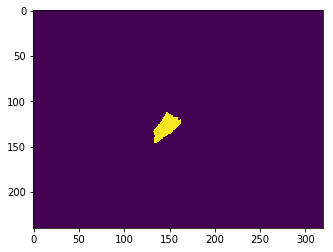

In [48]:
a = image==1
b = image ==2
b = b*2
ab = np.append(a,b,axis=0)
print(a.shape,b.shape, np.append(a,b,axis=0).shape)
plt.imshow(a)
plt.imshow(b)
print(b)

In [46]:
c = image == 3
ac = np.append(ab, c, axis =0)
print(ac.shape)
ac = np.reshape(ac,(240,320,-1))
ac.shape

(720, 320)


(240, 320, 3)

In [5]:
directory = "./SURREAL/cmu/cluster_train/sample/"
np.random.choice(os.listdir(directory),5)

array(['80_66_c0003_44.jpg', 'ung_139_13_c0001_90.jpg',
       'ung_77_06_c0004_3.jpg', 'ung_91_13_c0004_59.jpg',
       'ung_126_07_c0006_62.jpg'], dtype='<U24')

## COnnected parts

Clean and heal frames

In [1]:
import scipy as sc
import scipy.io as scio
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt

In [4]:
im_2 = scio.loadmat('SURREAL/cmu/train/run0/01_01/01_01_c0001_segm.mat')
seg1 = im_2['segm_1']
im2 = ndimage.imread("./SURREAL/cmu/cluster_mod_train_heal/annotations/01_01_c0012_segm_5.png")

/home/blue/.virtualenvs/cv/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


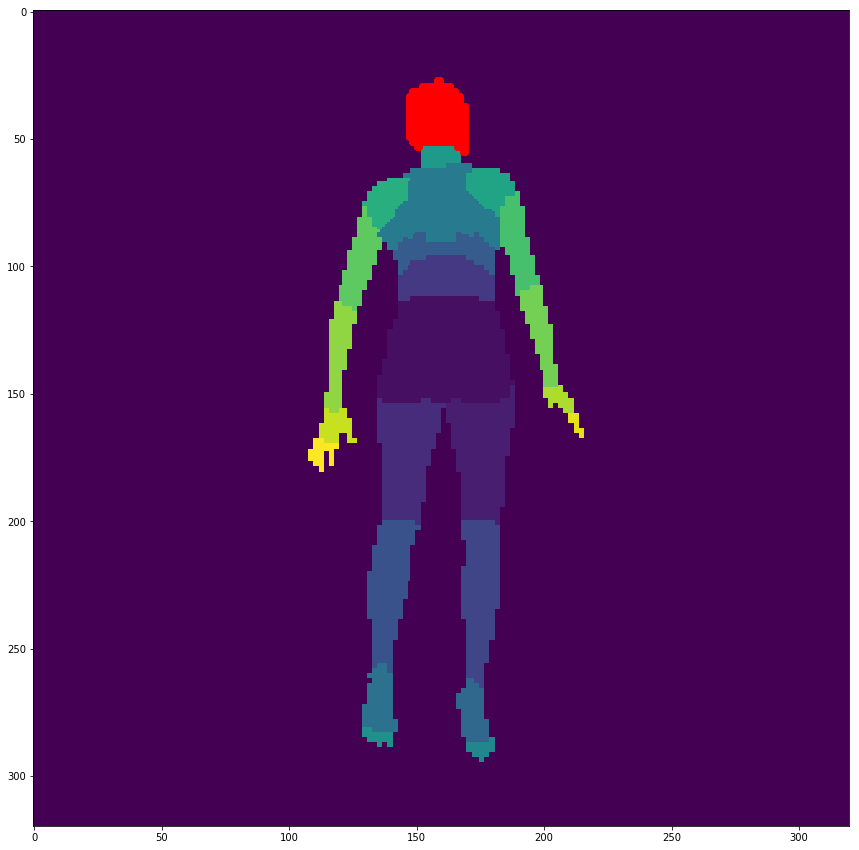

In [5]:
points_1 = np.where(im2 ==16)
plt.figure(figsize=(15,15))

plt.imshow(im2)
plt.scatter(points_1[1],points_1[0],color='red')
#plt.savefig("w_healing_1.png")

#### with gaussian filter and posterior labels (Not useful)

In [67]:
blur_radius = 0.5
threshold = 1

In [223]:
imagei = np.where(im2==16,im2,0)

In [159]:
imgf = ndimage.gaussian_filter(imagei, blur_radius)

In [224]:
s = np.ones((3,3))

In [225]:
labeled, nr_objects = ndimage.label(imagei, structure=s) 

In [226]:
print(labeled)
print(np.unique(labeled))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0 1 2 3 4 5]


In [227]:
print("Number of objects is %d " % nr_objects)

Number of objects is 5 


In [242]:
len(points[0])

16

[16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16]


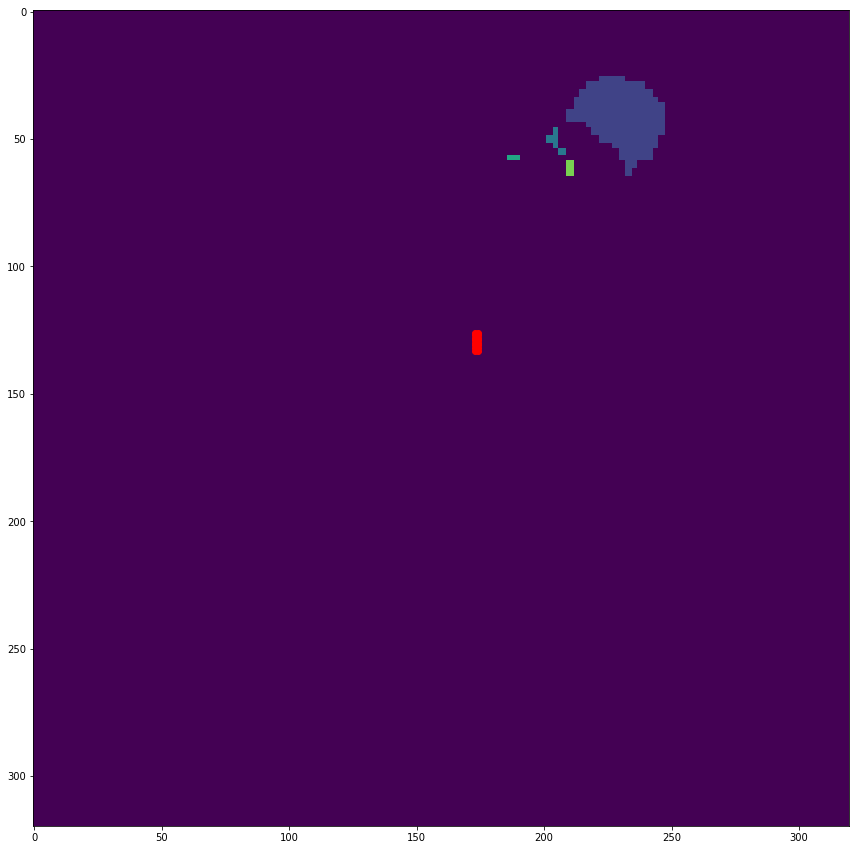

In [241]:
points = np.where(labeled ==5)
plt.figure(figsize=(15,15))

plt.scatter(points[1],points[0],color='red')
plt.imshow(labeled)
print(im2[points])

In [189]:
for i,j in points: print(i,j)

ValueError: too many values to unpack (expected 2)

In [146]:
seg1[points]

array([16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16], dtype=uint8)

## Algoritmo heal partes equivocadas

In [292]:
import scipy as sc
import scipy.io as scio
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import Counter
import imageio

In [308]:
path = "./SURREAL/cmu/cluster_mod_train/annotations/"
obj_path = "./SURREAL/cmu/cluster_mod_train_heal/annotations/"

In [309]:
ies = np.array([0,0,1,-1,1,1,-1,-1])
jes = np.array([1,-1,0,0,1,-1,1,-1])
s = np.ones((3,3))

In [310]:
def heal(path, obj_path, ies, jes, s):
    count = 0
    for h in os.listdir(path):
        
        if count % 1000 == 0: print(count)
        name = os.path.join(path, h)
        im = ndimage.imread(name)
        ###healing head
        imagei = np.where(im==16,im,0)
        labeled, nr_objects = ndimage.label(imagei, structure=s) 
        l = 1

        if nr_objects > 1:
            for i in range(2, nr_objects+1):
                if len(np.where(labeled==l)[0]) < len(np.where(labeled==i)[0]):
                    l=i
            for ind in range(1,nr_objects+1):
                if ind != l:
                    points= np.where(labeled==ind)

                    for kk in range(len(points[0])):
                        i = points[0][kk]
                        j = points[1][kk]
                        val = []

                        for nei in range(len(ies)):
                            try:
                                if im[i+ies[nei],j+jes[nei]] != im[i,j]:
                                    val.append(im[i+ies[nei],j+jes[nei]])
                            except IndexError: pass
                        most_common,num_most_common = Counter(val).most_common(1)[0]

                        im[i,j] = most_common

        f_name = os.path.join(obj_path, h)
        imageio.imsave(f_name, im)
        count += 1

In [311]:
heal(path, obj_path,ies,jes,s)

0


/home/blue/.virtualenvs/cv/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  import sys


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000


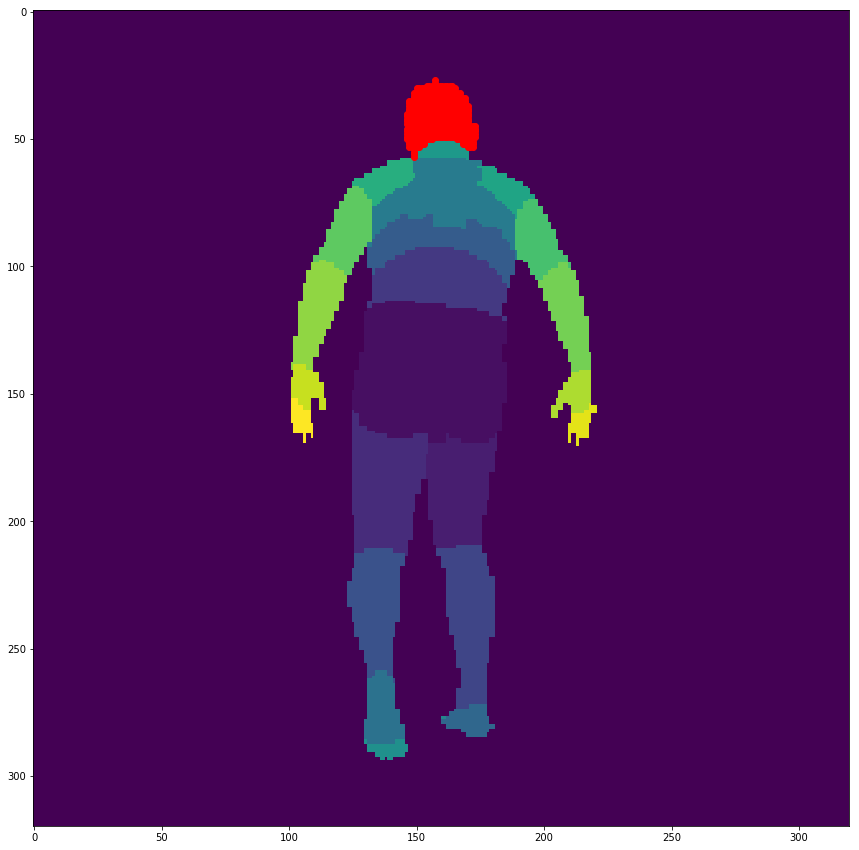

In [289]:
points = np.where(im ==16)
plt.figure(figsize=(15,15))

plt.scatter(points[1],points[0],color='red')
plt.imshow(im)


In [296]:
im = ndimage.imread(os.path.join(obj_path,"ung_133_06_c0001_segm_100.png"))

/home/blue/.virtualenvs/cv/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """Entry point for launching an IPython kernel.


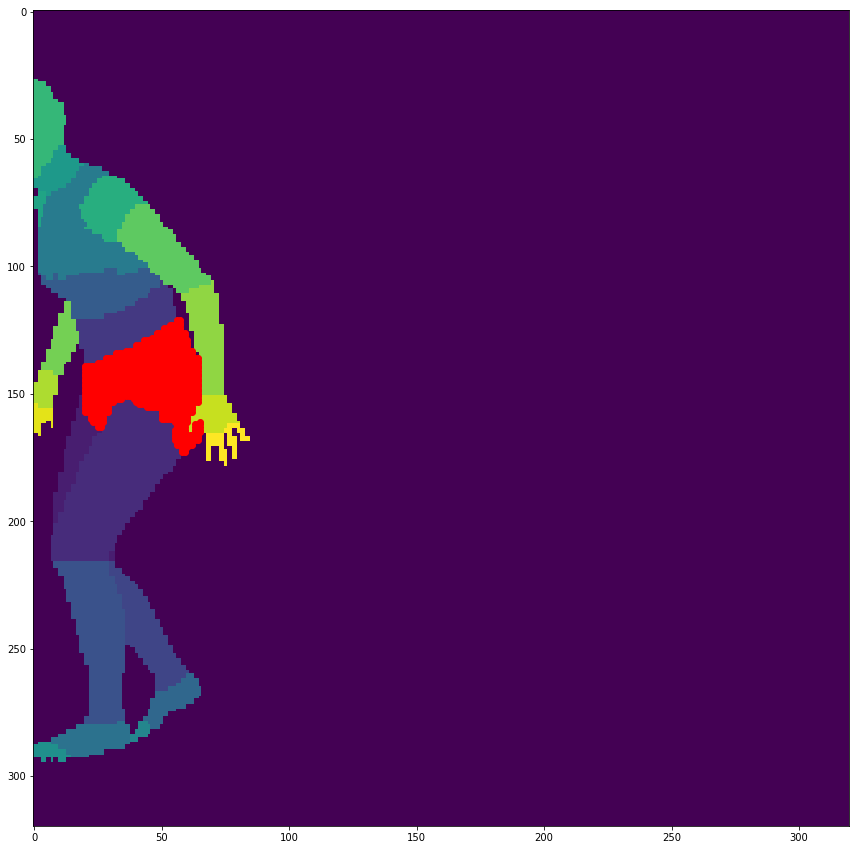

In [299]:
points = np.where(im ==1)
plt.figure(figsize=(15,15))

plt.scatter(points[1],points[0],color='red')
plt.imshow(im)


## Images for report

In [3]:
import tensorflow as tf
from imageio import imread,imsave
import matplotlib.pyplot as plt
import numpy as np

label_colours = [[0, 0, 0], [153, 76, 0], [153, 153, 0]
                # 0 = road, 1 = sidewalk, 2 = building
                ,[76, 153, 0], [0, 153, 0], [0, 153, 76]
                # 3 = wall, 4 = fence, 5 = pole
                ,[0,153, 153], [0, 76, 153], [0, 0, 153]
                # 6 = traffic light, 7 = traffic sign, 8 = vegetation
                ,[76, 0, 153], [153, 0, 153], [153, 0, 76]
                # 9 = terrain, 10 = sky, 11 = person
                ,[255, 51, 51], [255, 153, 51], [255, 255, 51]
                # 12 = rider, 13 = car, 14 = truck
                ,[153, 255, 51], [51, 255, 51], [51, 255, 153]
                # 15 = bus, 16 = train, 17 = motocycle
                ,[51, 255, 255], [51,153,255],[51,51,255],[153,51,255],[255,52,255],[255,52,153], [192,192,192]]
                # 18 = bicycle

np.matrix(label_colours).shape

def decode_labels(mask, img_shape, num_classes):

    color_table = label_colours

    color_mat = tf.constant(color_table, dtype=tf.float32)
    onehot_output = tf.one_hot(mask, depth=num_classes)
    onehot_output = tf.reshape(onehot_output, (-1, num_classes))
    pred = tf.matmul(onehot_output, color_mat)
    pred = tf.cast(tf.reshape(pred, (img_shape[0], img_shape[1], 3)),tf.uint8)
    
    return pred

im_1 = imread("./SURREAL/images/annotations/ung_144_02_c0006_segm_2.png")
im_2 = imread("./SURREAL/images/annotations/ung_77_09_c0001_segm_67.png")
im_3 = imread("./SURREAL/images/annotations/80_15_c0002_segm_85.png")
im_4 = imread("./SURREAL/images/annotations/ung_91_62_c0003_segm_87.png")
im_1.shape

im_1[180:190,120:130]

n_classes=25

im1 = decode_labels(im_1,im_1.shape, 25)
im2 = decode_labels(im_2,im_2.shape, 25)
im3 = decode_labels(im_3,im_3.shape, 25)
im4 = decode_labels(im_4,im_4.shape, 25)

with tf.Session() as sess:
    f_im1= sess.run(im1)
    f_im2= sess.run(im2)
    f_im3= sess.run(im3)
    f_im4= sess.run(im4)
    
imsave("./written/ung_144_02_c0006_segm_2.png",f_im1)
imsave("./written/ung_77_09_c0001_segm_67.png",f_im2)
imsave("./written/80_15_c0002_segm_85.png",f_im3)
imsave("./written/ung_91_62_c0003_segm_87.png",f_im4)



## What resize does?

In [2]:
import scipy as sc
import scipy.io as scio
from scipy import ndimage, misc
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import Counter
import imageio
from skimage.transform import resize,rescale

In [1]:
obj_path = "./SURREAL/cmu/cluster_mod_train_heal/annotations/02_05_c0005_segm_80.png"
path = "./SURREAL/cmu/cluster_mod_train_heal/sample/02_05_c0005_80.jpg"

**SHIT**

In [4]:
im = imageio.imread(obj_path)

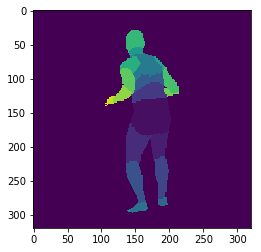

In [5]:
plt.imshow(im)

In [19]:
n_im = rescale(im,0.2, mode='constant')

In [20]:
np.unique(n_im)

array([0.00000000e+00, 3.34373052e-16, 8.91661472e-16, 1.00311916e-15,
       1.00311916e-15, 1.78332294e-15, 2.00623831e-15, 2.22915368e-15,
       2.50779789e-15, 3.00935747e-15, 3.12081515e-15, 3.56664589e-15,
       5.34996883e-15, 5.74007073e-15, 6.24163031e-15, 7.57912251e-15,
       9.47390314e-15, 3.92156863e-03, 3.92156863e-03, 7.84313725e-03,
       7.84313725e-03, 1.17647059e-02, 1.17647059e-02, 1.17647059e-02,
       1.56862745e-02, 1.56862745e-02, 1.56862745e-02, 1.56862745e-02,
       1.96078431e-02, 1.96078431e-02, 2.35294118e-02, 2.35294118e-02,
       2.74509804e-02, 2.74509804e-02, 2.74509804e-02, 3.13725490e-02,
       3.13725490e-02, 3.52941176e-02, 3.92156863e-02, 3.92156863e-02,
       3.92156863e-02, 3.92156863e-02, 3.92156863e-02, 3.92156863e-02,
       4.70588235e-02, 5.09803922e-02, 5.49019608e-02, 5.49019608e-02,
       5.88235294e-02, 5.88235294e-02, 5.88235294e-02, 6.27450980e-02,
       6.27450980e-02, 6.66666667e-02, 7.05882353e-02, 7.05882353e-02,
      

**NOT SHIT**

In [22]:
n_im = misc.imresize(im, (64,64), 'nearest')

/home/blue/.virtualenvs/cv/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


In [23]:
np.unique(n_im)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 22, 24], dtype=uint8)

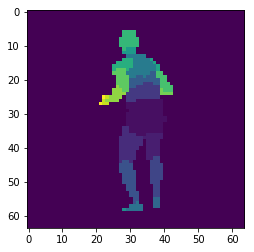

In [24]:
plt.imshow(n_im)

indeed great


In [3]:
im_2 = imageio.imread(path)

In [4]:
n_im_2 = misc.imresize(im_2,(256,256),'nearest')

/home/blue/.virtualenvs/cv/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


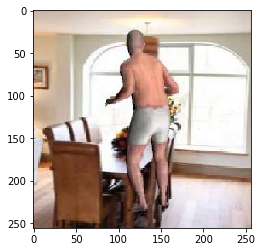

In [5]:
plt.imshow(n_im_2)

## Diferentes resoluciones

In [1]:
idx = [0]
idx_h = [16]
idx_toes = [11,12]
idx_fingers = [23,24]
idx_Ulegs = [2,3]
idx_LLegs = [5,6]
idx_torso = [1,4,7,10]
idx_feets = [8,9]
idx_shoulders =  [14,15]
idx_upperarm = [17,18]
idx_lowerarm = [19,20]
idx_hands = [21,22]
idx_neck  =[13]

In [2]:
import scipy as sc
import scipy.io as scio
from scipy import ndimage, misc
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import Counter
import imageio
from skimage.transform import resize,rescale, rotate

In [3]:
obj_path = "./SURREAL/cmu/cluster_mod_train_heal/annotations/02_05_c0005_segm_80.png"

In [4]:
im =imageio.imread(obj_path)

[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 22 24]


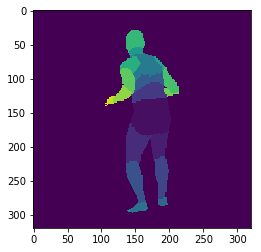

In [5]:
plt.imshow(im)
print(np.unique(im))

### Resolucion minima

In [6]:
n_im = np.where(im != 0,1,0 )

[0 1]


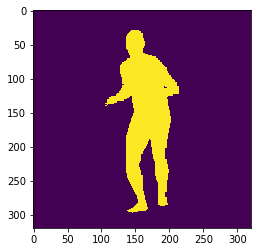

In [7]:
plt.imshow(n_im)
print(np.unique(n_im))

### Resolucion 2a

In [8]:
classes = [[16,13],
          [7,10,14,15],
           [1,4],
          [17,18,19,20,21,22,23,24],
          [2,3,5,6,8,9,11,12]]
class_list = [25,26,27,28,29]
class_values = [1,2,3,4,5]

In [9]:
n_im_1 = im

In [10]:
for i,j in zip(classes,class_list):
    for h in i:
        n_im_1 = np.where(n_im_1 ==h,j,n_im_1)
for i in range(1,len(class_list)+1):
    n_im_1 = np.where(n_im_1 == class_list[i-1],class_values[i-1], n_im_1)

[0 1 2 3 4 5]


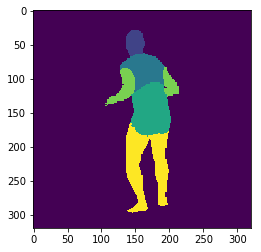

In [11]:
plt.imshow(n_im_1)
print(np.unique(n_im_1))

### resolucion 3a

In [12]:
classes = [[16,13],
          [8,11],
          [9,12],
          [21,23],
          [22,24],
          [17,19],
          [18,20],
          [2,5],
          [3,6],
          [14,15,10,7],
          [1,4]]
class_list = [25,26,27,28,29,30,31,32,33,34,35]
class_values = [1,2, 3,4,5,6,7,8,9,10,11]

In [13]:
n_im_2 = im

In [14]:
for i,j in zip(classes,class_list):
    for h in i:
        n_im_2 = np.where(n_im_2 ==h,j,n_im_2)
for i in range(1,len(class_list)+1):
    n_im_2 = np.where(n_im_2 == class_list[i-1],i, n_im_2)

[ 0  1  2  3  5  6  7  8  9 10 11]


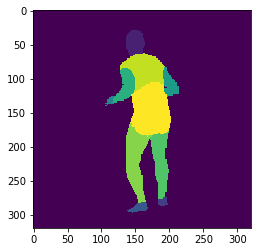

In [15]:
plt.imshow(n_im_2)
print(np.unique(n_im_2))

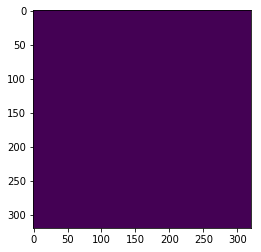

In [129]:
plt.imshow(np.where(n_im==5,1,0))

In [130]:
final_ground  = np.stack([n_im,n_im_1,n_im_2,im])

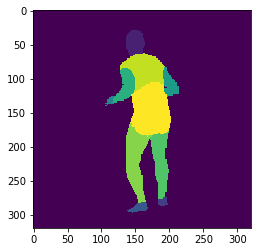

In [137]:
plt.imshow(final_ground[2,:,:])

In [138]:
np.unique(final_ground)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 22, 24])

### mala rotacion?


In [145]:
np.unique(rotate(n_im_1, 10, preserve_range=True).astype(int))

array([0, 1, 2, 3, 4])

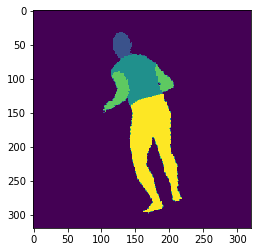

In [144]:
plt.imshow(rotate(n_im_1, 10, preserve_range=True).astype(int))

### mala funcion? 

In [64]:
def _transform_labels(image, classes, class_list):
    for i,j in zip(classes,class_list):
        for h in i:
            image = np.where(image == h,j,image)
    for i in range(1,len(class_values)+1):
           image = np.where(image == class_list[i-1],i, image)

    return image.astype(np.int64)

In [65]:
nn = _transform_labels(im, classes, class_list)

In [66]:
np.unique(nn)

array([0, 1, 2, 3, 4, 5])

In [167]:
np.unique(misc.imresize(nn, (64,64), 'nearest', mode="F").astype(np.int64))

/home/blue/.virtualenvs/cv/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


array([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 22, 24])

In [170]:
np.unique(misc.imresize(im, (64,64),'nearest', mode='F'))

/home/blue/.virtualenvs/cv/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 22., 24.], dtype=float32)

### For report

In [12]:
import tensorflow as tf
from imageio import imread,imsave
import matplotlib.pyplot as plt
import numpy as np

label_colours = [[0, 0, 0], [153, 76, 0], [153, 153, 0]
                # 0 = road, 1 = sidewalk, 2 = building
                ,[76, 153, 0], [0, 153, 0], [0, 153, 76]
                # 3 = wall, 4 = fence, 5 = pole
                ,[0,153, 153], [0, 76, 153], [0, 0, 153]
                # 6 = traffic light, 7 = traffic sign, 8 = vegetation
                ,[76, 0, 153], [153, 0, 153], [153, 0, 76]
                # 9 = terrain, 10 = sky, 11 = person
                ,[255, 51, 51], [255, 153, 51], [255, 255, 51]
                # 12 = rider, 13 = car, 14 = truck
                ,[153, 255, 51], [51, 255, 51], [51, 255, 153]
                # 15 = bus, 16 = train, 17 = motocycle
                ,[51, 255, 255], [51,153,255],[51,51,255],[153,51,255],[255,52,255],[255,52,153], [192,192,192]]
                # 18 = bicycle

    
label_colours_1 = [[0, 0, 0], [153, 76, 0]]
label_colours_2 = [[0, 0, 0], [153, 76, 0], [153, 153, 0]
                # 0 = road, 1 = sidewalk, 2 = building
                ,[76, 153, 0], [0, 153, 0], [0, 153, 76]]
label_colours_3 = [[0, 0, 0], [153, 76, 0], [153, 153, 0]
                # 0 = road, 1 = sidewalk, 2 = building
                ,[76, 153, 0], [0, 153, 0], [0, 153, 76]
                # 3 = wall, 4 = fence, 5 = pole
                ,[0,153, 153], [0, 76, 153], [0, 0, 153]
                # 6 = traffic light, 7 = traffic sign, 8 = vegetation
                ,[76, 0, 153], [153, 0, 153], [153, 0, 76]]

np.matrix(label_colours).shape

def decode_labels(mask, img_shape, num_classes, label_colours):

    color_table = label_colours

    color_mat = tf.constant(color_table, dtype=tf.float32)
    onehot_output = tf.one_hot(mask, depth=num_classes)
    onehot_output = tf.reshape(onehot_output, (-1, num_classes))
    pred = tf.matmul(onehot_output, color_mat)
    pred = tf.cast(tf.reshape(pred, (img_shape[0], img_shape[1], 3)),tf.uint8)
    
    return pred

im_1 = imread("./SURREAL/cmu/cluster_mod_train_heal/annotations/02_05_c0005_segm_80.png")


im_1[180:190,120:130]

n_classes=25

im1 = decode_labels(im_1,im_1.shape, 2,label_colours_1)
im2 = decode_labels(im_1,im_1.shape, 6,label_colours_2)
im3 = decode_labels(im_1,im_1.shape, 12,label_colours_3)
im4 = decode_labels(im_1,im_1.shape, 25, label_colours)

with tf.Session() as sess:
    f_im1= sess.run(im1)
    f_im2= sess.run(im2)
    f_im3= sess.run(im3)
    f_im4= sess.run(im4)
    
imsave("./written/02_05_c0005_segm_80_2c.png",f_im1)
imsave("./written/02_05_c0005_segm_80_6c.png",f_im2)
imsave("./written/02_05_c0005_segm_80_12c.png",f_im3)
imsave("./written/02_05_c0005_segm_80_25c.png",f_im4)

# Infojoints

In [13]:
def find_joints_box(im,perc_w =0.1, perc_h=0.1):
    shapy = im.shape
    left = []
    right = []
    top = []
    bottom = []

    for i in range(shapy[0]):
        for j in range(shapy[1]):
            if im[i,j] != 0:
                left.append(j)
                break
        for j in range(shapy[1]-1,-1,-1):
            if im[i,j] != 0:
                right.append(j)
                break

    for j in range(shapy[1]):
        for i in range(shapy[0]):
            if im[i,j] != 0:
                top.append(i)
                break
        for i in range(shapy[0]-1,-1,-1):
            if im[i,j] != 0:
                bottom.append(i)
                break
    
    if len(bottom) != 0:
        f_left = np.min(left)
        f_right = np.max(right)
        f_top = np.min(top)
        f_bottom = np.max(bottom)

        width = np.abs(f_right -f_left)
        height = np.abs(f_bottom -f_top)

        x = int(np.floor(f_left + width/2))
        y = int(np.floor(f_top +height/2))
        
    else:
        x = -1
        y = -1
        width,height = 0,0

    return x,y, max(width, height)

In [14]:
import scipy as sc
import scipy.io as scio
from scipy import ndimage, misc
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import Counter
import imageio
from skimage.transform import resize,rescale, rotate

In [15]:
obj_path = "./SURREAL/cmu/cluster_mod_train_heal/annotations/02_05_c0005_segm_80.png"

In [16]:
im = imageio.imread(obj_path)

## function for array of joints and box

In [17]:
def joints(image, n_joints):
    coords = np.zeros((n_joints,2))
    for i in range(1, n_joints+1):
        n_im = np.where(image==i,1,0)
        x,y,size = find_joints_box(n_im)
        coords[i-1] = x,y
    
    return coords, size

In [18]:
coord,s = joints(im, 24)

In [19]:
coord.reshape(-1)

array([172., 157., 185., 197., 156., 194., 170., 121., 188., 245., 150.,
       252., 170., 105., 190., 281., 155., 289., 166.,  83.,  -1.,  -1.,
       140., 293., 151.,  60., 184.,  77., 142.,  80., 150.,  45., 202.,
       102., 138., 103., 203., 120., 131., 123.,  -1.,  -1., 114., 131.,
        -1.,  -1., 109., 133.])

In [20]:
for i in range(len(coord)):
    print(np.array_equal(coord[i],[-1,-1]))

False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
True
False
True
False


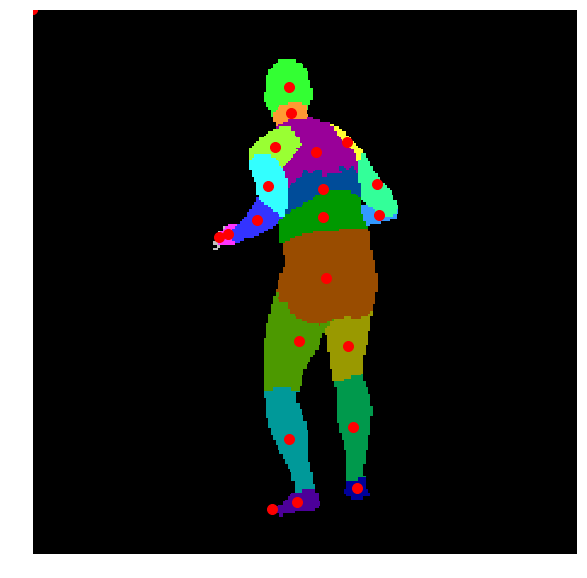

In [21]:
plt.figure(figsize=(10,10))
plt.scatter(coord[:,0],coord[:,1], color='red', s=100)
plt.imshow(f_im4)
plt.axis('off')
plt.savefig("./written/final/Figures/central_point_parts.png",bbox_inches='tight')

In [23]:
str1 = ' '.join(str(e) for e in list(coord.reshape(-1)))
str1

'172.0 157.0 185.0 197.0 156.0 194.0 170.0 121.0 188.0 245.0 150.0 252.0 170.0 105.0 190.0 281.0 155.0 289.0 166.0 83.0 -1.0 -1.0 140.0 293.0 151.0 60.0 184.0 77.0 142.0 80.0 150.0 45.0 202.0 102.0 138.0 103.0 203.0 120.0 131.0 123.0 -1.0 -1.0 114.0 131.0 -1.0 -1.0 109.0 133.0'

In [24]:
im = scio.loadmat('SURREAL/cmu/train/run0/02_05/02_05_c0005_info.mat')
im_2 = scio.loadmat('SURREAL/cmu/train/run0/02_05/02_05_c0005_segm.mat')


In [57]:
new_joints = np.stack([im['joints2D'][:,:,79][0],im['joints2D'][:,:,79][1]]).reshape(-1,2)

In [25]:
label_colours = [[0, 0, 0], [153, 76, 0], [153, 153, 0]
                # 0 = road, 1 = sidewalk, 2 = building
                ,[76, 153, 0], [0, 153, 0], [0, 153, 76]
                # 3 = wall, 4 = fence, 5 = pole
                ,[0,153, 153], [0, 76, 153], [0, 0, 153]
                # 6 = traffic light, 7 = traffic sign, 8 = vegetation
                ,[76, 0, 153], [153, 0, 153], [153, 0, 76]
                # 9 = terrain, 10 = sky, 11 = person
                ,[255, 51, 51], [255, 153, 51], [255, 255, 51]
                # 12 = rider, 13 = car, 14 = truck
                ,[153, 255, 51], [51, 255, 51], [51, 255, 153]
                # 15 = bus, 16 = train, 17 = motocycle
                ,[51, 255, 255], [51,153,255],[51,51,255],[153,51,255],[255,52,255],[255,52,153], [192,192,192]]
                # 18 = bicycle

im_1 = im_2['segm_80']

n_classes=25

im4 = decode_labels(im_1,im_1.shape, 25, label_colours)

with tf.Session() as sess:

    f_im4= sess.run(im4)


In [31]:
import math
l,t,r,b = find_crops(im_1)

10 239 41 270


/home/blue/.virtualenvs/cv/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """


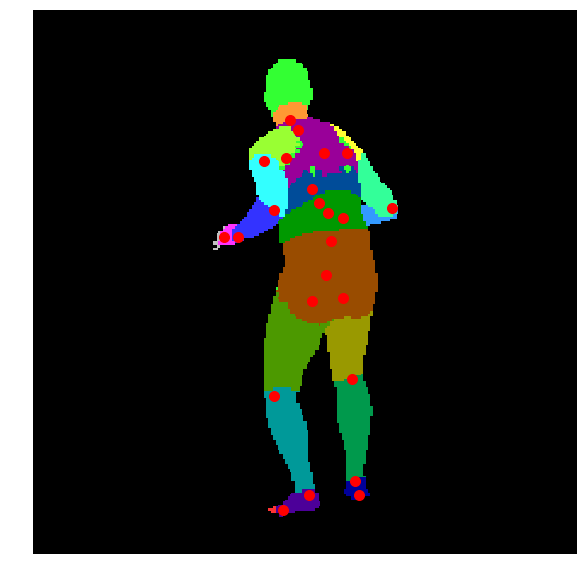

In [38]:
plt.figure(figsize=(10,10))
plt.scatter((im['joints2D'][:,:,79][0]-l)*320/(max(r-l,b-t)),(im['joints2D'][:,:,79][1]-t)*320/(max(r-l,b-t)),
            color="red", s=100)
#plt.scatter(jointies[:,0],jointies[:,1])
plt.imshow(sc.misc.imresize(crop(f_im4,l,t,r,b), (320,320), interp="nearest"))
plt.axis('off')
plt.savefig("./written/final/Figures/surreal_joints.png", bbox_inches = "tight")


## crear archivo para joints

In [46]:
def rad_original_file(which="train"):
    if which=="train":
        file ='./hourglass/hourglasstensorlfow/list/train_cluster_list.txt'
    elif which=="eval":
        file = "./hourglass/hourglasstensorlfow/list/eval_cluster_list.txt"
    else:
        file ="./hourglass/hourglasstensorlfow/list/test_cluster_list.txt"
        
    data_dict = {}
    train_table = []
    input_file = open(file, 'r')
    print('READING TRAIN DATA')
    for line in input_file:
        line = line.strip()
        line = line.split(' ')
        name = line[0]
        gt_name = line[1]

        data_dict[name] = {'gt_name' : gt_name}
        train_table.append(name)
            #lista de diccionarios con caja, coordin. de joints y weights de cada uno de los joints
    input_file.close()
    return data_dict, train_table

In [88]:
def define_joints_file(which="train"):
    d_dict, table = rad_original_file(which)
    if which=="train":
        first_path = "./SURREAL/cmu/cluster_mod_train_heal/"
        file_name = "./hourglass/train_head.txt"
        
    elif which=="eval":
        first_path = "./SURREAL/cmu/cluster_mod_eval_heal/"
        file_name = "./hourglass/eval_head.txt"
    else:
        first_path = "./SURREAL/cmu/cluster_mod_test_heal/"
        file_name = "./hourglass/test_head.txt"
    
    with open(file_name, 'w') as f:
        count = 0
        for i in table:
            gt_name = d_dict[i]['gt_name']
            namy = os.path.join(first_path, gt_name)
            im = imageio.imread(namy)
            coord,s = joints(im, 24)
            d_dict[i]['joints'] = coord
            str1 = ' '.join(str(e) for e in list(coord.reshape(-1)))
            f.write(i + " " + str1 + "\n")
            count += 1
            if count % 2500 == 0: print(count)
        f.close()
    
    
    

In [51]:
define_joints_file()
define_joints_file("eval")
define_joints_file("test")

READING TRAIN DATA


KeyboardInterrupt: 

## crear archivo con los joints del original dataset

In [51]:
def create_joints_file(which="train"):
    d_dict, table = rad_original_file(which)
    print("File creation begun")
    if which=="train":
        first_path = "./SURREAL/cmu/train/run0/"
        file_name = "./hourglass/train_joints.txt"
        
    elif which=="eval":
        first_path = "./SURREAL/cmu/val/run0/"
        file_name = "./hourglass/eval_joints.txt"
    else:
        first_path = "./SURREAL/cmu/test/run0/"
        file_name = "./hourglass/test_joints.txt"
    
    with open(file_name, 'w') as f:
        count = 0
        for i in table:
            gt_name = d_dict[i]['gt_name']
            namy = os.path.join(first_path, gt_name)
            coord = obtain_path_n_joints(gt_name, first_path)
            d_dict[i]['joints'] = coord.reshape(-1,2)
            str1 = ' '.join(str(e) for e in list(coord.reshape(-1)))
            f.write(i + " " + str1 + "\n")
            count += 1
            if count % 1000 == 0: print(count);
        f.close()
    

In [52]:
def obtain_path_n_joints(gt, root):
    
    parts = gt.split("/")[1].split("_")
    
    if parts[0] == "ung":
        next_1 = "_".join(parts[:3])
        next_2 = "_".join(["_".join(parts[:4]), "info.mat"])
        next_3 = "_".join(["_".join(parts[:4]), "segm.mat"])
        number = parts[-1].split(".")[0]
        name = str("segm_"+ str(number))
    else:
        next_1 = "_".join(parts[:2])
        next_2 = "_".join(["_".join(parts[:3]), "info.mat"])
        next_3 = "_".join(["_".join(parts[:3]), "segm.mat"])
        number = parts[-1].split(".")[0]
        name = str("segm_"+ str(number))
        
    complete_path = os.path.join(root, next_1, next_2)
    complete_2  = os.path.join(root, next_1, next_3)
    im = scio.loadmat(complete_path)
    n_im = scio.loadmat(complete_2)[name]
    l,t,r,b = find_crops(n_im)
    w = r-l
    
    joints_x = ((im['joints2D'][:,:,int(number)-1][0]-l)*320/(w+0.000001)).astype(np.int32)
    joints_y = ((im['joints2D'][:,:,int(number)-1][1]-t)*320/(w+0.000001)).astype(np.int32)
    joints= np.c_[joints_x, joints_y]
    
    return joints

In [53]:
create_joints_file()
create_joints_file("eval")
create_joints_file("test")

READING TRAIN DATA
File creation begun
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
READING TRAIN DATA
File creation begun
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
READING TRAIN DATA
File creation begun
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000


## Pasar joints relativos

In [42]:
import scipy as sc
import scipy.io as scio
from scipy import ndimage, misc
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import Counter
import imageio
from skimage.transform import resize,rescale, rotate
import math

In [41]:
def find_crops(im,perc_w =0.1, perc_h=0.1):
    shapy = im.shape
    left = []
    right = []
    top = []
    bottom = []

    for i in range(shapy[0]):
        for j in range(shapy[1]):
            if im[i,j] != 0:
                left.append(j)
                break
        for j in range(shapy[1]-1,-1,-1):
            if im[i,j] != 0:
                right.append(j)
                break

    for j in range(shapy[1]):
        for i in range(shapy[0]):
            if im[i,j] != 0:
                top.append(i)
                break
        for i in range(shapy[0]-1,-1,-1):
            if im[i,j] != 0:
                bottom.append(i)
                break
    try:
        f_left = np.min(left)
        f_right = np.max(right)
        f_top = np.min(top)
        f_bottom = np.max(bottom)

        width = f_right -f_left
        height = f_bottom -f_top

        wth_plus = width*perc_w
        hgt_plus= height*perc_h

        f_left = int(round(f_left - wth_plus,0))
        f_right = int(round(f_right + wth_plus,0))
        f_top = int(round(f_top - hgt_plus,0))
        f_bottom = int(round(f_bottom + hgt_plus,0))

        new_w = f_right - f_left
        new_h = f_bottom - f_top

        if new_h > new_w:
            center = f_left + new_w/2
            f_left = int(math.ceil(center - new_h/2))
            f_right = int(math.ceil(center + new_h/2))
        else:
            center = f_top + new_h/2
            f_top = int(math.ceil(center - new_w/2))
            f_bottom = int(math.ceil(center + new_w/2))

        if f_left < 0: 
            residual = -f_left
            f_left = 0
            f_right = f_right + residual
        if f_right > shapy[1]-1: 
            residual = f_right -(shapy[1]-1)
            f_right = shapy[1]-1
            f_left = f_left -residual
        if f_top < 0:
            residual = -f_top
            f_top = 0
            f_bottom = f_bottom + residual
        if f_bottom > shapy[0]-1: 
            residual = f_bottom -(shapy[0]-1)
            f_bottom = shapy[0]-1
            f_top = f_top -residual

        if f_left < 0: f_left = 0
        if f_right > shapy[1]-1: f_right = shapy[1]-1
        if f_top < 0: f_top = 0
        if f_bottom > shapy[0]-1:f_bottom = shapy[0]-1
            
        if np.abs(f_right-f_left-(f_bottom-f_top)) == 1:
            if f_bottom-f_top > f_right-f_left:
                if f_left != 0:
                    f_left -= 1
                else:
                    f_right +=1
            if f_bottom-f_top < f_right-f_left:
                if f_top != 0:
                    f_top -= 1
                else:
                    f_bottom +=1  

        if f_right-f_left != f_bottom-f_top:
            if shapy[0] == np.min(shapy):
                if f_right-f_left > shapy[0]-1:
                    center = f_left + (f_right-f_left)/2
                    f_left = int(math.ceil(center - (shapy[0]-1)/2))
                    f_right = int(math.ceil(center +(shapy[0]-1)/2))
                if f_right-f_left < shapy[0]-1:
                    if f_left == 0:
                        f_right = shapy[0]-1
                    if f_right == shapy[1]-1:
                        f_left = f_left - (shapy[0]-(f_right-f_left))
            if shapy[1] == np.min(shapy):
                if f_bottom-f_top > shapy[1]:

                    center = f_top + (f_bottom-f_top)/2
                    f_top = int(math.ceil(center - (shapy[1]-1)/2))
                    f_bottom= int(math.ceil(center +(shapy[1]-1)/2))
                if f_bottom-f_top < shapy[1]-1:
                    if f_top == 0:
                        f_bottom = shapy[1]-1
                    if f_bottom == shapy[0]-1:
                        f_top = f_top - (shapy[1]-(f_bottom-f_top))


    except ValueError:
        if shapy[0] == np.min(shapy):
            f_left = 0
            f_right = shapy[0]-1
            f_bottom = shapy[0]-1
            f_top = 0
        if shapy[1]== np.min(shapy):
            f_left = 0
            f_right = shapy[1]-1
            f_bottom = shapy[1]-1
            f_top = 0
        
    assert f_right-f_left == f_bottom-f_top
    
    return f_left,f_top,f_right,f_bottom

def crop(im, f_left,f_top,f_right, f_bottom):
    new_im = im[f_top:f_bottom, f_left:f_right]
    print(f_top, f_bottom, f_left,f_right)
    return new_im

def resizeim(new_im, shapy):
    final_im = sc.misc.imresize(new_im, shapy, interp="nearest")
    return final_im


In [63]:
im_2 = scio.loadmat('SURREAL/cmu/train/run0/01_01/01_01_c0001_segm.mat')
im = scio.loadmat('SURREAL/cmu/train/run0/01_01/01_01_c0001_info.mat')
seg1 = im_2['segm_1']

21 229 51 259
(208, 208)


/home/blue/.virtualenvs/cv/lib/python3.6/site-packages/ipykernel_launcher.py:136: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


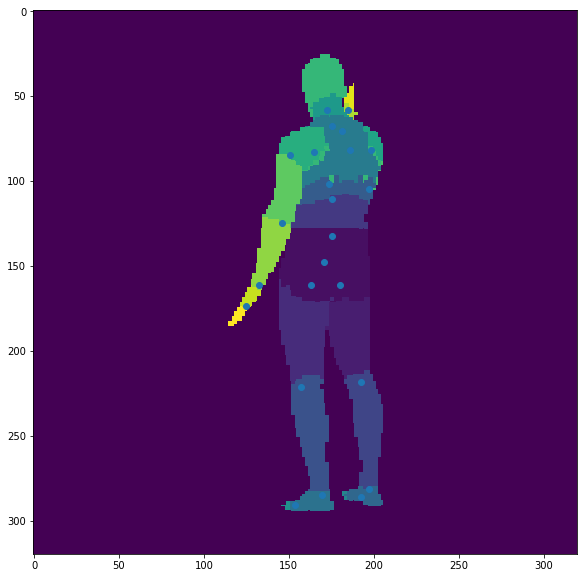

In [64]:
l,t,r,b = find_crops(im_2['segm_1'])
new_im =crop(im_2['segm_1'],l,t,r,b)
print(new_im.shape)
plt.figure(figsize=(10,10))
dif_x,dif_y = 320-new_im.shape[0], 240-new_im.shape[1]
#plt.imshow(new_im)
#plt.scatter(im['joints2D'][:,:,0][0]-51,im['joints2D'][:,:,0][1]-21, c='red')
plt.imshow(resizeim(new_im, (320,320)))
plt.scatter((im['joints2D'][:,:,0][0]-51)*320/208,
            (im['joints2D'][:,:,0][1]-21)*320/208)

In [83]:
joints_x = ((im['joints2D'][:,:,0][0]-51)*320/208).astype(np.int32)
joints_y = ((im['joints2D'][:,:,0][1]-21)*320/208).astype(np.int32)
joints = joints_x,joints_y
np.c_[joints]

array([[170, 147],
       [180, 161],
       [163, 161],
       [175, 132],
       [192, 218],
       [156, 221],
       [175, 110],
       [196, 281],
       [169, 284],
       [173, 101],
       [192, 286],
       [153, 290],
       [175,  67],
       [186,  81],
       [164,  83],
       [172,  58],
       [198,  81],
       [150,  84],
       [196, 104],
       [146, 124],
       [181,  70],
       [132, 161],
       [184,  58],
       [124, 173]], dtype=int32)

In [79]:
joints.reshape(-1,2)

array([[170, 147],
       [180, 161],
       [163, 161],
       [175, 132],
       [192, 218],
       [156, 221],
       [175, 110],
       [196, 281],
       [169, 284],
       [173, 101],
       [192, 286],
       [153, 290],
       [175,  67],
       [186,  81],
       [164,  83],
       [172,  58],
       [198,  81],
       [150,  84],
       [196, 104],
       [146, 124],
       [181,  70],
       [132, 161],
       [184,  58],
       [124, 173]], dtype=int32)

### Comprobacion joints

In [54]:
input_file = open("./hourglass/train_joints.txt", 'r')
for line in input_file:
    line = line.strip()
    line = line.split(' ')
    name = line[0]
    joints = list(map(int,line[1:]))
    joints = np.reshape(joints, (-1,2))
    break

In [55]:
im = imageio.imread("./SURREAL/cmu/cluster_mod_train_heal/" + name)

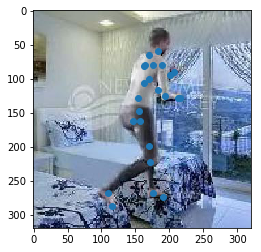

In [56]:
plt.imshow(im)
plt.scatter(joints[:,0], joints[:,1])